In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import encoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr

import seaborn as sns; sns.set()

NomeBase = "LamostMedium"

Loaded  3 encoders.


In [4]:
from keras.layers import Input, Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras import regularizers

import math
import keras
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from keras.models import Model

from pympler import muppy, summary

In [3]:
def print_memory_summary():
    all_objects = muppy.get_objects()
    sum1 = summary.summarize(all_objects)
    summary.print_(sum1)

## Modelo para treinamento

In [20]:
def training_model():
    input_x0 = Input(shape=(66,), name='inp0')
    encoded0 = Dense(224, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(input_x0)
    a0=LeakyReLU(alpha=0.1)(encoded0)
    encoded1 = Dense(320, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a0)
    a1=LeakyReLU(alpha=0.1)(encoded1)
    encoded2 = Dense(608, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a1)
    a2=LeakyReLU(alpha=0.1)(encoded2)
    encoded3 = Dense(320, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a2)
    a3=LeakyReLU(alpha=0.1)(encoded3)
    encoded4 = Dense(128, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a3)
    a4=LeakyReLU(alpha=0.1)(encoded4)
    encoded5 = Dense(64, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a4)
    a5=LeakyReLU(alpha=0.1)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "HeUniform", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

# Dwarfs

In [1]:
AouG = "Dwarfs"
NomeBase = "LamostMedium"

In [5]:
AnasCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Dwarfs.csv", index_col = 'ID')

In [6]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040731   0.6183  1.0508  1.2710  1.2807  1.2519  1.3407   
iDR4_3_SPLUS-n02n18_0034154   0.2075  0.3849  0.9449  1.0038  1.1963  1.4454   
iDR4_3_SPLUS-n02n18_0036979   0.2639  0.5195  1.2247  1.3780  1.9246  2.1031   
iDR4_3_SPLUS-n02n18_0011190   0.3266  0.4263  1.0195  1.0906  1.3868  1.5834   
iDR4_3_SPLUS-n02n18_0013484   0.2196  0.4738  1.1639  1.3388  1.8705  2.0127   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0164_0045592  0.4731  0.4658  0.8994  0.9522  1.1874  1.3375   
iDR4_3_STRIPE82-0164_0032054  0.2347  0.3997  1.1143  1.1965  1.7398  1.8666   
iDR4_3_STRIPE82-0164_0041441  0.2886  0.5299  1.2053  1.3902  2.0450  2.1581   
iDR4_3_STRIPE82-0164_0041016  0.2571  0.3707  1.1182  1.2620  1.7489  1.8980   
iDR4_3_STRIPE82-0166_0037167  0.3146  0.5458  1.1777  1.2909  1.6945  1.8721   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0040731   1.2224  1.0877  1.1028  0.9948  ...   6614.94   
iDR4_3_SPLUS-n02n18_0034154   1.6982  1.7883  1.8254  1.8025  ...   5645.36   
iDR4_3_SPLUS-n02n18_0036979   2.5980  2.6773  2.8487  2.9154  ...   5044.25   
iDR4_3_SPLUS-n02n18_0011190   1.6034  1.7468  1.6009  1.9268  ...   5632.16   
iDR4_3_SPLUS-n02n18_0013484   2.6149  2.7070  2.8212  2.9471  ...   4776.82   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0164_0045592  0.3479  1.5321  0.8582  1.6254  ...   6078.74   
iDR4_3_STRIPE82-0164_0032054  1.8041  2.5429  2.3426  2.6659  ...   4953.50   
iDR4_3_STRIPE82-0164_0041441  2.8287  3.0373  2.9388  3.4185  ...   4599.52   
iDR4_3_STRIPE82-0164_0041016  2.1156  2.3064  2.2523  2.6967  ...   4853.23   
iDR4_3_STRIPE82-0166_0037167  2.1038  2.2249  2.2224  2.3622  ...   5450.11   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n02n18_0040731      4.099   -0.274        0.076    -0.26760   
iDR4_3_SPLUS-n02n18_0034154      4.312   -0.334        0.085     0.07561   
iDR4_3_SPLUS-n02n18_0036979      3.626   -0.136        0.061     0.05919   
iDR4_3_SPLUS-n02n18_0011190      4.148    0.001        0.001    -0.09541   
iDR4_3_SPLUS-n02n18_0013484      4.266   -0.273       -0.021    -0.10056   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0164_0045592     4.159   -0.228    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0164_0032054     4.713   -0.598    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0164_0041441     4.443   -0.296    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0164_0041016     4.699   -0.448    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0166_0037167     4.146    0.253    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040731     -0.03872    -0.13689     0.12154     0.08599   
iDR4_3_SPLUS-n02n18_0034154      0.08418     0.06322     0.16942     0.04026   
iDR4_3_SPLUS-n02n18_0036979      0.08039     0.03626     0.13601     0.02489   
iDR4_3_SPLUS-n02n18_0011190      0.01560     0.25512    -0.00759    -0.00156   
iDR4_3_SPLUS-n02n18_0013484      0.17008    -0.13612    -0.12723    -0.14240   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0164_0045592 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0164_0032054 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0164_0041441 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0164_0041016 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [7]:
xtrain = AnasCores.iloc[:, :66]

In [8]:
xtrain

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040731   0.6183  1.0508  1.2710  1.2807  1.2519  1.3407   
iDR4_3_SPLUS-n02n18_0034154   0.2075  0.3849  0.9449  1.0038  1.1963  1.4454   
iDR4_3_SPLUS-n02n18_0036979   0.2639  0.5195  1.2247  1.3780  1.9246  2.1031   
iDR4_3_SPLUS-n02n18_0011190   0.3266  0.4263  1.0195  1.0906  1.3868  1.5834   
iDR4_3_SPLUS-n02n18_0013484   0.2196  0.4738  1.1639  1.3388  1.8705  2.0127   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0164_0045592  0.4731  0.4658  0.8994  0.9522  1.1874  1.3375   
iDR4_3_STRIPE82-0164_0032054  0.2347  0.3997  1.1143  1.1965  1.7398  1.8666   
iDR4_3_STRIPE82-0164_0041441  0.2886  0.5299  1.2053  1.3902  2.0450  2.1581   
iDR4_3_STRIPE82-0164_0041016  0.2571  0.3707  1.1182  1.2620  1.7489  1.8980   
iDR4_3_STRIPE82-0166_0037167  0.3146  0.5458  1.1777  1.2909  1.6945  1.8721   

                                 u-r  u-J660     u-i  u-J861  ...  r-J660  \
ID                                                            ...           
iDR4_3_SPLUS-n02n18_0040731   1.2224  1.0877  1.1028  0.9948  ... -0.1347   
iDR4_3_SPLUS-n02n18_0034154   1.6982  1.7883  1.8254  1.8025  ...  0.0901   
iDR4_3_SPLUS-n02n18_0036979   2.5980  2.6773  2.8487  2.9154  ...  0.0793   
iDR4_3_SPLUS-n02n18_0011190   1.6034  1.7468  1.6009  1.9268  ...  0.1434   
iDR4_3_SPLUS-n02n18_0013484   2.6149  2.7070  2.8212  2.9471  ...  0.0921   
...                              ...     ...     ...     ...  ...     ...   
iDR4_3_STRIPE82-0164_0045592  0.3479  1.5321  0.8582  1.6254  ...  1.1842   
iDR4_3_STRIPE82-0164_0032054  1.8041  2.5429  2.3426  2.6659  ...  0.7388   
iDR4_3_STRIPE82-0164_0041441  2.8287  3.0373  2.9388  3.4185  ...  0.2086   
iDR4_3_STRIPE82-0164_0041016  2.1156  2.3064  2.2523  2.6967  ...  0.1908   
iDR4_3_STRIPE82-0166_0037167  2.1038  2.2249  2.2224  2.3622  ...  0.1211   

                                 r-i  r-J861     r-z  J660-i  J660-J861  \
ID                                                                        
iDR4_3_SPLUS-n02n18_0040731  -0.1196 -0.2276 -0.2137  0.0151    -0.0929   
iDR4_3_SPLUS-n02n18_0034154   0.1272  0.1043  0.1038  0.0371     0.0142   
iDR4_3_SPLUS-n02n18_0036979   0.2507  0.3174  0.3562  0.1714     0.2381   
iDR4_3_SPLUS-n02n18_0011190  -0.0025  0.3234  0.1141 -0.1459     0.1800   
iDR4_3_SPLUS-n02n18_0013484   0.2063  0.3322  0.3433  0.1142     0.2401   
...                              ...     ...     ...     ...        ...   
iDR4_3_STRIPE82-0164_0045592  0.5103  1.2775  1.2295 -0.6739     0.0933   
iDR4_3_STRIPE82-0164_0032054  0.5385  0.8618  0.8282 -0.2003     0.1230   
iDR4_3_STRIPE82-0164_0041441  0.1101  0.5898  0.5577 -0.0985     0.3812   
iDR4_3_STRIPE82-0164_0041016  0.1367  0.5811  0.2940 -0.0541     0.3903   
iDR4_3_STRIPE82-0166_0037167  0.1186  0.2584  0.2515 -0.0025     0.1373   

                              J660-z  i-J861     i-z  J861-z  
ID                                                            
iDR4_3_SPLUS-n02n18_0040731  -0.0790 -0.1080 -0.0941  0.0139  
iDR4_3_SPLUS-n02n18_0034154   0.0137 -0.0229 -0.0234 -0.0005  
iDR4_3_SPLUS-n02n18_0036979   0.2769  0.0667  0.1055  0.0388  
iDR4_3_SPLUS-n02n18_0011190  -0.0293  0.3259  0.1166 -0.2093  
iDR4_3_SPLUS-n02n18_0013484   0.2512  0.1259  0.1370  0.0111  
...                              ...     ...     ...     ...  
iDR4_3_STRIPE82-0164_0045592  0.0453  0.7672  0.7192 -0.0480  
iDR4_3_STRIPE82-0164_0032054  0.0894  0.3233  0.2897 -0.0336  
iDR4_3_STRIPE82-0164_0041441  0.3491  0.4797  0.4476 -0.0321  
iDR4_3_STRIPE82-0164_0041016  0.1032  0.4444  0.1573 -0.2871  
iDR4_3_STRIPE82-0166_0037167  0.1304  0.1398  0.1329 -0.0069  

[3703 rows x 66 columns]

In [9]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [10]:
ytrain = AnasCores[columnYtrain]

In [11]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')

C:\Users\alber\AppData\Local\Temp\ipykernel_25476\3238081216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')


In [12]:
#encoder.save_encoders()

In [13]:
train_x= encoder.encode_Colors(xtrain, "Dwarfs") #The input vector: 66 stellar colors

train_y = ytrain

c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoders[nameC].fit_transform(pd.DataFrame(df[column]))
c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoders[nameC].fit_transform(pd.DataFrame(df[column]))
c:\Users\alber\Envs\analiseIC\MachineLearningSplus\RedeNeural\package\encoder.py:58: SettingWithCopyWarning: 
A 

##### Separando base para Treinamento da temperatura, logg e feh

In [14]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [15]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [16]:
X_train.shape

(2665, 66)

In [17]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-s02s26_0005116    5885.54     4.266   -0.140        0.020   
iDR4_3_STRIPE82-0030_0024134   5847.62     3.860   -0.489        0.126   
iDR4_3_STRIPE82-0052_0026120   5304.36     4.542   -0.091       -0.012   
iDR4_3_STRIPE82-0132_0042427   5805.73     4.268   -0.686        0.189   
iDR4_3_STRIPE82-0132_0008211   5517.52     4.448   -0.078       -0.018   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0010044   5408.61     4.372   -0.772        0.214   
iDR4_3_STRIPE82-0048_0020497   5798.10     4.292   -0.021       -0.012   
iDR4_3_STRIPE82-0101_0038087   5657.67     3.692   -0.298    -9999.000   
iDR4_3_STRIPE82-0004_0034437   5404.82     3.919    0.097       -0.003   
iDR4_3_STRIPE82-0006_0036451   5770.73     4.397   -0.590        0.182   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-s02s26_0005116     -0.00651     0.07106     0.28749     0.07225   
iDR4_3_STRIPE82-0030_0024134     0.14767     0.21414     0.04253     0.22676   
iDR4_3_STRIPE82-0052_0026120    -0.03709     0.01314     0.04713     0.04450   
iDR4_3_STRIPE82-0132_0042427     0.19569     0.18189    -0.11842     0.26081   
iDR4_3_STRIPE82-0132_0008211    -0.08193     0.00242     0.01999    -0.03045   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0004_0010044     0.06898     0.28655    -0.20496     0.29743   
iDR4_3_STRIPE82-0048_0020497    -0.04513    -0.01666     0.17366    -0.00542   
iDR4_3_STRIPE82-0101_0038087 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0004_0034437     0.05498    -0.01281     0.17984     0.02042   
iDR4_3_STRIPE82-0006_0036451     0.06402     0.12801    -0.09473     0.26424   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_SPLUS-s02s26_0005116      0.00488    -0.00420     0.361428  
iDR4_3_STRIPE82-0030_0024134     0.08979    -0.06067     0.336390  
iDR4_3_STRIPE82-0052_0026120    -0.02452    -0.00457    -0.022311  
iDR4_3_STRIPE82-0132_0042427     0.17328    -0.00317     0.308731  
iDR4_3_STRIPE82-0132_0008211    -0.02595    -0.02534     0.118434  
...                                  ...         ...          ...  
iDR4_3_STRIPE82-0004_0010044     0.16761     0.03707     0.046523  
iDR4_3_STRIPE82-0048_0020497    -0.00932     0.01954     0.303694  
iDR4_3_STRIPE82-0101_0038087 -9999.00000 -9999.00000     0.210971  
iDR4_3_STRIPE82-0004_0034437     0.02849     0.04819     0.044021  
iDR4_3_STRIPE82-0006_0036451     0.16372     0.02291     0.285622  

[2665 rows x 11 columns]

### Teff

In [18]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [21]:
modelTEFF = training_model()
batchSize = 32
epochs = 200

In [20]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/200
84/84 - 1s - loss: 0.1830 - val_loss: 0.1751 - 1s/epoch - 16ms/step
Epoch 2/200
84/84 - 0s - loss: 0.1732 - val_loss: 0.1711 - 426ms/epoch - 5ms/step
Epoch 3/200
84/84 - 0s - loss: 0.1705 - val_loss: 0.1697 - 406ms/epoch - 5ms/step
Epoch 4/200
84/84 - 0s - loss: 0.1678 - val_loss: 0.1664 - 410ms/epoch - 5ms/step
Epoch 5/200
84/84 - 0s - loss: 0.1657 - val_loss: 0.1635 - 413ms/epoch - 5ms/step
Epoch 6/200
84/84 - 0s - loss: 0.1635 - val_loss: 0.1626 - 405ms/epoch - 5ms/step
Epoch 7/200
84/84 - 0s - loss: 0.1613 - val_loss: 0.1622 - 402ms/epoch - 5ms/step
Epoch 8/200
84/84 - 0s - loss: 0.1589 - val_loss: 0.1580 - 435ms/epoch - 5ms/step
Epoch 9/200
84/84 - 0s - loss: 0.1562 - val_loss: 0.1552 - 453ms/epoch - 5ms/step
Epoch 10/200
84/84 - 0s - loss: 0.1538 - val_loss: 0.1529 - 462ms/epoch - 5ms/step
Epoch 11/200
84/84 - 0s - loss: 0.1519 - val_loss: 0.1522 - 485ms/epoch - 6ms/step
Epoch 12/200
84/84 - 0s - loss: 0.1497 - val_loss: 0.1504 - 494ms/epoch - 6ms/step
Epoch 13/200
84

Text(0, 0.5, 'Loss')

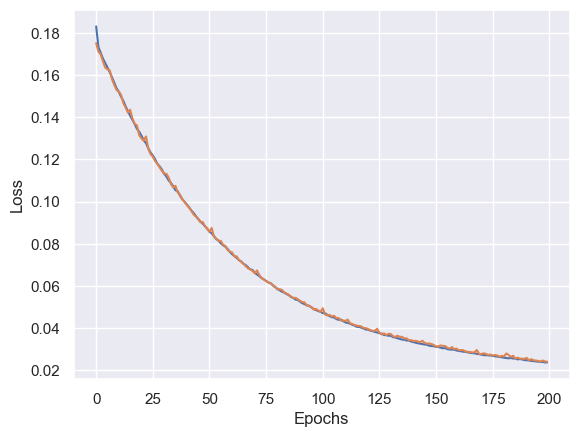

In [21]:
# Verify if is training correctly
title = 'Teff_loss'
plt.plot(historyTEFF.history['loss'][:])
plt.plot(historyTEFF.history['val_loss'][:])
plt.title(title)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('scores'+title+'.png', dpi=300)

In [22]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\TEFF-Dwarfs.h5


In [23]:
predTeff = modelTEFF.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [24]:
predaux = encoder.decode_DataFrame(predTeff, 'teffMedium')
Y_test['TEFF_PredictDecoded'] = predaux

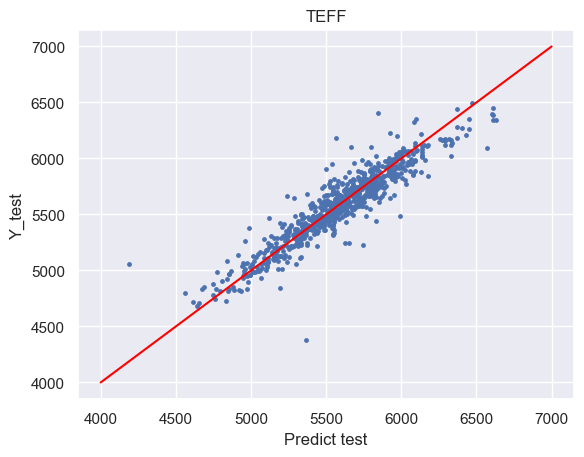

In [25]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(5200, 6200)
#plt.ylim(5200, 6200)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 7000], [4000, 7000], c='red')

In [26]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded']))
print('Mean Absolute Error: ', mean_absolute_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded']))
print('Median Absolute Error: ', median_absolute_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded']))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded']) * 100, '%')


with open("scores/teffScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded']) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 86.0%
Mean Squared Error:  17758.175745473887
Mean Absolute Error:  94.4470036268556
Median Absolute Error:  70.28529296874967
Mean Absolute Percentage Error:  1.6945997109546336 %


In [27]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0005_0028605   5685.09     4.253   -0.497        0.165   
iDR4_3_STRIPE82-0048_0013477   5253.51     4.347   -0.302        0.159   
iDR4_3_STRIPE82-0030_0047340   5725.44     4.436   -0.209       -0.005   
iDR4_3_STRIPE82-0130_0008941   5013.25     4.198   -0.038       -0.005   
iDR4_3_STRIPE82-0006_0012431   5116.29     4.289    0.058       -0.032   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n02n28_0020503    5228.77     3.948   -0.136        0.089   
iDR4_3_STRIPE82-0132_0019055   5652.10     4.056   -0.086        0.135   
iDR4_3_STRIPE82-0006_0024027   5391.94     4.308    0.159       -0.037   
iDR4_3_SPLUS-n02n25_0022647    5716.10     3.890   -0.548        0.052   
iDR4_3_SPLUS-n04n01_0045383    5338.17     3.829   -0.220    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0005_0028605     0.17985     0.08121     0.06669     0.24823   
iDR4_3_STRIPE82-0048_0013477     0.04655     0.17966    -0.01043     0.21871   
iDR4_3_STRIPE82-0030_0047340    -0.00348    -0.02077     0.15071     0.00338   
iDR4_3_STRIPE82-0130_0008941    -0.07105     0.05844     0.06584    -0.04190   
iDR4_3_STRIPE82-0006_0012431    -0.00450    -0.01086     0.09835    -0.01338   
...                                  ...         ...         ...         ...   
iDR4_3_SPLUS-n02n28_0020503      0.07635     0.09427    -0.04551     0.16613   
iDR4_3_STRIPE82-0132_0019055     0.10474     0.10234     0.09820     0.21770   
iDR4_3_STRIPE82-0006_0024027    -0.01274    -0.05130     0.11948    -0.01593   
iDR4_3_SPLUS-n02n25_0022647      0.14588     0.01461    -0.06593     0.06914   
iDR4_3_SPLUS-n04n01_0045383  -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0005_0028605     0.16309     0.05935     0.229076   
iDR4_3_STRIPE82-0048_0013477     0.10999     0.04033    -0.055886   
iDR4_3_STRIPE82-0030_0047340     0.00995     0.00871     0.255718   
iDR4_3_STRIPE82-0130_0008941    -0.04802     0.01047    -0.214523   
iDR4_3_STRIPE82-0006_0012431    -0.02291     0.03095    -0.146489   
...                                  ...         ...          ...   
iDR4_3_SPLUS-n02n28_0020503      0.05183     0.06135    -0.072221   
iDR4_3_STRIPE82-0132_0019055     0.13217     0.03695     0.207293   
iDR4_3_STRIPE82-0006_0024027     0.04669     0.05998     0.035516   
iDR4_3_SPLUS-n02n25_0022647      0.04316    -0.04740     0.249551   
iDR4_3_SPLUS-n04n01_0045383  -9999.00000 -9999.00000     0.000013   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_STRIPE82-0005_0028605          5616.755859  
iDR4_3_STRIPE82-0048_0013477          5377.888672  
iDR4_3_STRIPE82-0030_0047340          5737.735840  
iDR4_3_STRIPE82-0130_0008941          4987.496094  
iDR4_3_STRIPE82-0006_0012431          5077.765625  
...                                           ...  
iDR4_3_SPLUS-n02n28_0020503           5261.276855  
iDR4_3_STRIPE82-0132_0019055          5249.500000  
iDR4_3_STRIPE82-0006_0024027          5389.843262  
iDR4_3_SPLUS-n02n25_0022647           5695.339355  
iDR4_3_SPLUS-n04n01_0045383           5365.528320  

[741 rows x 12 columns]

In [28]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [29]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [131]:
modelLOGG = training_model()
batchSize = 256
epochs = 500

In [132]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/500


11/11 - 1s - loss: 6.1931 - val_loss: 0.4627 - 671ms/epoch - 61ms/step
Epoch 2/500
11/11 - 0s - loss: 0.7490 - val_loss: 0.4627 - 84ms/epoch - 8ms/step
Epoch 3/500
11/11 - 0s - loss: 0.3158 - val_loss: 0.3443 - 84ms/epoch - 8ms/step
Epoch 4/500
11/11 - 0s - loss: 0.2766 - val_loss: 0.2476 - 81ms/epoch - 7ms/step
Epoch 5/500
11/11 - 0s - loss: 0.2445 - val_loss: 0.2271 - 96ms/epoch - 9ms/step
Epoch 6/500
11/11 - 0s - loss: 0.2292 - val_loss: 0.2219 - 96ms/epoch - 9ms/step
Epoch 7/500
11/11 - 0s - loss: 0.2232 - val_loss: 0.2197 - 97ms/epoch - 9ms/step
Epoch 8/500
11/11 - 0s - loss: 0.2203 - val_loss: 0.2176 - 99ms/epoch - 9ms/step
Epoch 9/500
11/11 - 0s - loss: 0.2180 - val_loss: 0.2159 - 94ms/epoch - 9ms/step
Epoch 10/500
11/11 - 0s - loss: 0.2166 - val_loss: 0.2144 - 95ms/epoch - 9ms/step
Epoch 11/500
11/11 - 0s - loss: 0.2152 - val_loss: 0.2130 - 96ms/epoch - 9ms/step
Epoch 12/500
11/11 - 0s - loss: 0.2139 - val_loss: 0.2117 - 100ms/epoch - 9ms/step
Epoch 13/500
11/11 - 0s - loss: 0.

Text(0, 0.5, 'Loss')

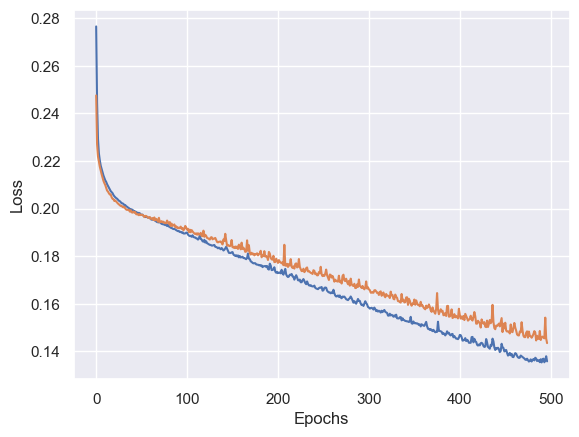

In [133]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][:])
plt.plot(historyLOGG.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [134]:
modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\LOGG-Dwarfs.h5


In [135]:
predlogg = modelLOGG.predict(X_test)

24/24 [==============================] - 0s 2ms/step


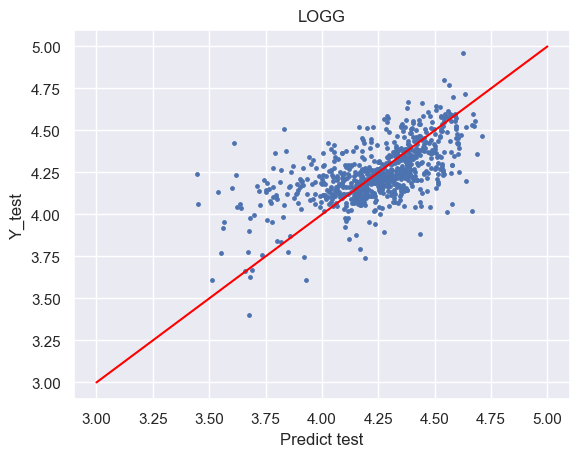

In [136]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
#plt.xlim(3.5, 5)
#plt.ylim(3.5, 5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([3, 5], [3, 5], c='red')

plt.grid(True)

In [137]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 4) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test[columnTrain], predlogg))
print('Mean Absolute Error: ', mean_absolute_error(Y_test[columnTrain], predlogg))
print('Median Absolute Error: ', median_absolute_error(Y_test[columnTrain], predlogg))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test[columnTrain], predlogg) * 100, '%')

with open("scores/loggScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test[columnTrain], predlogg)}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test[columnTrain], predlogg)}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test[columnTrain], predlogg)}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test[columnTrain], predlogg) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 33.489999999999995%
Mean Squared Error:  0.033608801022434645
Mean Absolute Error:  0.13577925356711773
Median Absolute Error:  0.10055234527587897
Mean Absolute Percentage Error:  3.2675544555890537 %


In [138]:
Y_test['LOGG_Predict'] = predlogg

In [139]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0005_0028605   5685.09     4.253   -0.497        0.165   
iDR4_3_STRIPE82-0048_0013477   5253.51     4.347   -0.302        0.159   
iDR4_3_STRIPE82-0030_0047340   5725.44     4.436   -0.209       -0.005   
iDR4_3_STRIPE82-0130_0008941   5013.25     4.198   -0.038       -0.005   
iDR4_3_STRIPE82-0006_0012431   5116.29     4.289    0.058       -0.032   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n02n28_0020503    5228.77     3.948   -0.136        0.089   
iDR4_3_STRIPE82-0132_0019055   5652.10     4.056   -0.086        0.135   
iDR4_3_STRIPE82-0006_0024027   5391.94     4.308    0.159       -0.037   
iDR4_3_SPLUS-n02n25_0022647    5716.10     3.890   -0.548        0.052   
iDR4_3_SPLUS-n04n01_0045383    5338.17     3.829   -0.220    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0005_0028605     0.17985     0.08121     0.06669     0.24823   
iDR4_3_STRIPE82-0048_0013477     0.04655     0.17966    -0.01043     0.21871   
iDR4_3_STRIPE82-0030_0047340    -0.00348    -0.02077     0.15071     0.00338   
iDR4_3_STRIPE82-0130_0008941    -0.07105     0.05844     0.06584    -0.04190   
iDR4_3_STRIPE82-0006_0012431    -0.00450    -0.01086     0.09835    -0.01338   
...                                  ...         ...         ...         ...   
iDR4_3_SPLUS-n02n28_0020503      0.07635     0.09427    -0.04551     0.16613   
iDR4_3_STRIPE82-0132_0019055     0.10474     0.10234     0.09820     0.21770   
iDR4_3_STRIPE82-0006_0024027    -0.01274    -0.05130     0.11948    -0.01593   
iDR4_3_SPLUS-n02n25_0022647      0.14588     0.01461    -0.06593     0.06914   
iDR4_3_SPLUS-n04n01_0045383  -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0005_0028605     0.16309     0.05935     0.229076   
iDR4_3_STRIPE82-0048_0013477     0.10999     0.04033    -0.055886   
iDR4_3_STRIPE82-0030_0047340     0.00995     0.00871     0.255718   
iDR4_3_STRIPE82-0130_0008941    -0.04802     0.01047    -0.214523   
iDR4_3_STRIPE82-0006_0012431    -0.02291     0.03095    -0.146489   
...                                  ...         ...          ...   
iDR4_3_SPLUS-n02n28_0020503      0.05183     0.06135    -0.072221   
iDR4_3_STRIPE82-0132_0019055     0.13217     0.03695     0.207293   
iDR4_3_STRIPE82-0006_0024027     0.04669     0.05998     0.035516   
iDR4_3_SPLUS-n02n25_0022647      0.04316    -0.04740     0.249551   
iDR4_3_SPLUS-n04n01_0045383  -9999.00000 -9999.00000     0.000013   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_STRIPE82-0005_0028605          5616.755859      4.183275  
iDR4_3_STRIPE82-0048_0013477          5377.888672      4.391226  
iDR4_3_STRIPE82-0030_0047340          5737.735840      4.153541  
iDR4_3_STRIPE82-0130_0008941          4987.496094      4.516603  
iDR4_3_STRIPE82-0006_0012431          5077.765625      4.587422  
...                                           ...           ...  
iDR4_3_SPLUS-n02n28_0020503           5261.276855      4.088063  
iDR4_3_STRIPE82-0132_0019055          5249.500000      4.344841  
iDR4_3_STRIPE82-0006_0024027          5389.843262      4.349382  
iDR4_3_SPLUS-n02n25_0022647           5695.339355      4.179061  
iDR4_3_SPLUS-n04n01_0045383           5365.528320      3.986102  

[741 rows x 13 columns]

In [140]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [141]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [164]:
modelFEH = training_model()
batchSize = 32
epochs = 150

In [165]:
# model=load_model('modelosNovos\\Lamost-MR\\FEH_Dwarfs.h5')
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/150


84/84 - 2s - loss: 0.1982 - val_loss: 0.1887 - 2s/epoch - 18ms/step
Epoch 2/150
84/84 - 1s - loss: 0.1844 - val_loss: 0.1849 - 540ms/epoch - 6ms/step
Epoch 3/150
84/84 - 1s - loss: 0.1822 - val_loss: 0.1803 - 509ms/epoch - 6ms/step
Epoch 4/150
84/84 - 1s - loss: 0.1799 - val_loss: 0.1777 - 505ms/epoch - 6ms/step
Epoch 5/150
84/84 - 0s - loss: 0.1767 - val_loss: 0.1750 - 489ms/epoch - 6ms/step
Epoch 6/150
84/84 - 0s - loss: 0.1762 - val_loss: 0.1738 - 444ms/epoch - 5ms/step
Epoch 7/150
84/84 - 0s - loss: 0.1735 - val_loss: 0.1731 - 446ms/epoch - 5ms/step
Epoch 8/150
84/84 - 0s - loss: 0.1727 - val_loss: 0.1740 - 446ms/epoch - 5ms/step
Epoch 9/150
84/84 - 0s - loss: 0.1717 - val_loss: 0.1689 - 477ms/epoch - 6ms/step
Epoch 10/150
84/84 - 0s - loss: 0.1687 - val_loss: 0.1695 - 487ms/epoch - 6ms/step
Epoch 11/150
84/84 - 0s - loss: 0.1668 - val_loss: 0.1665 - 460ms/epoch - 5ms/step
Epoch 12/150
84/84 - 0s - loss: 0.1638 - val_loss: 0.1638 - 468ms/epoch - 6ms/step
Epoch 13/150
84/84 - 0s - l

Text(0, 0.5, 'Loss')

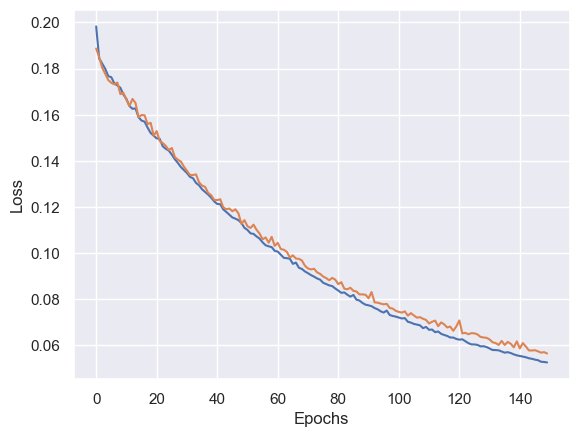

In [166]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [170]:
modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\FEH-Dwarfs.h5


In [167]:
predfeh = modelFEH.predict(X_test)

24/24 [==============================] - 0s 2ms/step


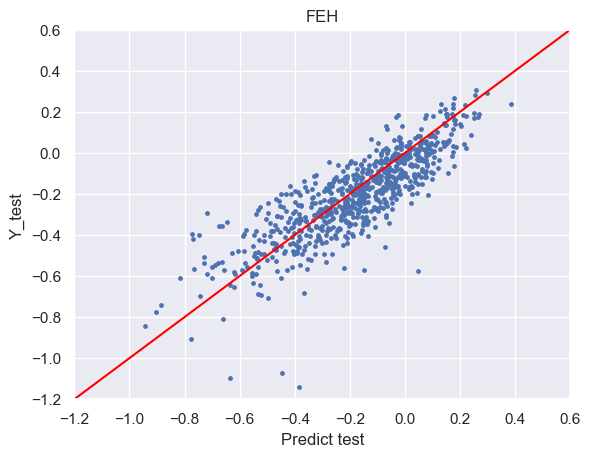

In [168]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-1.2, 0.6)
plt.ylim(-1.2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [169]:
score = r2_score(Y_test['feh_cnn'], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test['feh_cnn'], predfeh))
print('Mean Absolute Error: ', mean_absolute_error(Y_test['feh_cnn'], predfeh))
print('Median Absolute Error: ', median_absolute_error(Y_test['feh_cnn'], predfeh))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test['feh_cnn'], predfeh) * 100, '%')

with open("scores/fehScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test['feh_cnn'], predfeh)}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test['feh_cnn'], predfeh)}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test['feh_cnn'], predfeh)}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test['feh_cnn'], predfeh) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 69.0%
Mean Squared Error:  0.015810576307761323
Mean Absolute Error:  0.09515967386383839
Median Absolute Error:  0.07895439374446869
Mean Absolute Percentage Error:  183080955264013.62 %


In [171]:
Y_test['FEH_Predict'] = predfeh

In [172]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0005_0028605   5685.09     4.253   -0.497        0.165   
iDR4_3_STRIPE82-0048_0013477   5253.51     4.347   -0.302        0.159   
iDR4_3_STRIPE82-0030_0047340   5725.44     4.436   -0.209       -0.005   
iDR4_3_STRIPE82-0130_0008941   5013.25     4.198   -0.038       -0.005   
iDR4_3_STRIPE82-0006_0012431   5116.29     4.289    0.058       -0.032   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n02n28_0020503    5228.77     3.948   -0.136        0.089   
iDR4_3_STRIPE82-0132_0019055   5652.10     4.056   -0.086        0.135   
iDR4_3_STRIPE82-0006_0024027   5391.94     4.308    0.159       -0.037   
iDR4_3_SPLUS-n02n25_0022647    5716.10     3.890   -0.548        0.052   
iDR4_3_SPLUS-n04n01_0045383    5338.17     3.829   -0.220    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0005_0028605     0.17985     0.08121     0.06669     0.24823   
iDR4_3_STRIPE82-0048_0013477     0.04655     0.17966    -0.01043     0.21871   
iDR4_3_STRIPE82-0030_0047340    -0.00348    -0.02077     0.15071     0.00338   
iDR4_3_STRIPE82-0130_0008941    -0.07105     0.05844     0.06584    -0.04190   
iDR4_3_STRIPE82-0006_0012431    -0.00450    -0.01086     0.09835    -0.01338   
...                                  ...         ...         ...         ...   
iDR4_3_SPLUS-n02n28_0020503      0.07635     0.09427    -0.04551     0.16613   
iDR4_3_STRIPE82-0132_0019055     0.10474     0.10234     0.09820     0.21770   
iDR4_3_STRIPE82-0006_0024027    -0.01274    -0.05130     0.11948    -0.01593   
iDR4_3_SPLUS-n02n25_0022647      0.14588     0.01461    -0.06593     0.06914   
iDR4_3_SPLUS-n04n01_0045383  -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_STRIPE82-0005_0028605     0.16309     0.05935     0.229076   
iDR4_3_STRIPE82-0048_0013477     0.10999     0.04033    -0.055886   
iDR4_3_STRIPE82-0030_0047340     0.00995     0.00871     0.255718   
iDR4_3_STRIPE82-0130_0008941    -0.04802     0.01047    -0.214523   
iDR4_3_STRIPE82-0006_0012431    -0.02291     0.03095    -0.146489   
...                                  ...         ...          ...   
iDR4_3_SPLUS-n02n28_0020503      0.05183     0.06135    -0.072221   
iDR4_3_STRIPE82-0132_0019055     0.13217     0.03695     0.207293   
iDR4_3_STRIPE82-0006_0024027     0.04669     0.05998     0.035516   
iDR4_3_SPLUS-n02n25_0022647      0.04316    -0.04740     0.249551   
iDR4_3_SPLUS-n04n01_0045383  -9999.00000 -9999.00000     0.000013   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_STRIPE82-0005_0028605          5616.755859      4.183275    -0.709148  
iDR4_3_STRIPE82-0048_0013477          5377.888672      4.391226    -0.357043  
iDR4_3_STRIPE82-0030_0047340          5737.735840      4.153541    -0.063181  
iDR4_3_STRIPE82-0130_0008941          4987.496094      4.516603    -0.014399  
iDR4_3_STRIPE82-0006_0012431          5077.765625      4.587422    -0.118642  
...                                           ...           ...          ...  
iDR4_3_SPLUS-n02n28_0020503           5261.276855      4.088063    -0.098713  
iDR4_3_STRIPE82-0132_0019055          5249.500000      4.344841    -0.008330  
iDR4_3_STRIPE82-0006_0024027          5389.843262      4.349382     0.062649  
iDR4_3_SPLUS-n02n25_0022647           5695.339355      4.179061    -0.500178  
iDR4_3_SPLUS-n04n01_0045383           5365.528320      3.986102    -0.303465  

[741 rows x 14 columns]

In [173]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

## Outros parametros

In [174]:
AnasCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Dwarfs.csv", index_col = 'ID')

In [175]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040731   0.6183  1.0508  1.2710  1.2807  1.2519  1.3407   
iDR4_3_SPLUS-n02n18_0034154   0.2075  0.3849  0.9449  1.0038  1.1963  1.4454   
iDR4_3_SPLUS-n02n18_0036979   0.2639  0.5195  1.2247  1.3780  1.9246  2.1031   
iDR4_3_SPLUS-n02n18_0011190   0.3266  0.4263  1.0195  1.0906  1.3868  1.5834   
iDR4_3_SPLUS-n02n18_0013484   0.2196  0.4738  1.1639  1.3388  1.8705  2.0127   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0164_0045592  0.4731  0.4658  0.8994  0.9522  1.1874  1.3375   
iDR4_3_STRIPE82-0164_0032054  0.2347  0.3997  1.1143  1.1965  1.7398  1.8666   
iDR4_3_STRIPE82-0164_0041441  0.2886  0.5299  1.2053  1.3902  2.0450  2.1581   
iDR4_3_STRIPE82-0164_0041016  0.2571  0.3707  1.1182  1.2620  1.7489  1.8980   
iDR4_3_STRIPE82-0166_0037167  0.3146  0.5458  1.1777  1.2909  1.6945  1.8721   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0040731   1.2224  1.0877  1.1028  0.9948  ...   6614.94   
iDR4_3_SPLUS-n02n18_0034154   1.6982  1.7883  1.8254  1.8025  ...   5645.36   
iDR4_3_SPLUS-n02n18_0036979   2.5980  2.6773  2.8487  2.9154  ...   5044.25   
iDR4_3_SPLUS-n02n18_0011190   1.6034  1.7468  1.6009  1.9268  ...   5632.16   
iDR4_3_SPLUS-n02n18_0013484   2.6149  2.7070  2.8212  2.9471  ...   4776.82   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0164_0045592  0.3479  1.5321  0.8582  1.6254  ...   6078.74   
iDR4_3_STRIPE82-0164_0032054  1.8041  2.5429  2.3426  2.6659  ...   4953.50   
iDR4_3_STRIPE82-0164_0041441  2.8287  3.0373  2.9388  3.4185  ...   4599.52   
iDR4_3_STRIPE82-0164_0041016  2.1156  2.3064  2.2523  2.6967  ...   4853.23   
iDR4_3_STRIPE82-0166_0037167  2.1038  2.2249  2.2224  2.3622  ...   5450.11   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n02n18_0040731      4.099   -0.274        0.076    -0.26760   
iDR4_3_SPLUS-n02n18_0034154      4.312   -0.334        0.085     0.07561   
iDR4_3_SPLUS-n02n18_0036979      3.626   -0.136        0.061     0.05919   
iDR4_3_SPLUS-n02n18_0011190      4.148    0.001        0.001    -0.09541   
iDR4_3_SPLUS-n02n18_0013484      4.266   -0.273       -0.021    -0.10056   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0164_0045592     4.159   -0.228    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0164_0032054     4.713   -0.598    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0164_0041441     4.443   -0.296    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0164_0041016     4.699   -0.448    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0166_0037167     4.146    0.253    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040731     -0.03872    -0.13689     0.12154     0.08599   
iDR4_3_SPLUS-n02n18_0034154      0.08418     0.06322     0.16942     0.04026   
iDR4_3_SPLUS-n02n18_0036979      0.08039     0.03626     0.13601     0.02489   
iDR4_3_SPLUS-n02n18_0011190      0.01560     0.25512    -0.00759    -0.00156   
iDR4_3_SPLUS-n02n18_0013484      0.17008    -0.13612    -0.12723    -0.14240   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0164_0045592 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0164_0032054 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0164_0041441 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0164_0041016 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [176]:
print('cfe =', AnasCores['c_fe'].min())
print('cafe = ', AnasCores['ca_fe'].min())
print('nfe = ', AnasCores['n_fe'].min())
print('mgfe = ', AnasCores['mg_fe'].min())
print('sife = ', AnasCores['si_fe'].min())
print('nife = ', AnasCores['ni_fe'].min())

cfe = -9999.0
cafe =  -9999.0
nfe =  -9999.0
mgfe =  -9999.0
sife =  -9999.0
nife =  -9999.0


In [198]:
AnasCoresParams = AnasCores.loc[AnasCores['alpha_m_cnn'] != -9999]

In [199]:
print('cfe =', AnasCoresParams['c_fe'].min())
print('cafe = ', AnasCoresParams['ca_fe'].min())
print('nfe = ', AnasCoresParams['n_fe'].min())
print('mgfe = ', AnasCoresParams['mg_fe'].min())
print('sife = ', AnasCoresParams['si_fe'].min())
print('nife = ', AnasCoresParams['ni_fe'].min())

cfe = -0.28632
cafe =  -0.45868
nfe =  -0.35071
mgfe =  -0.22189
sife =  -0.17489
nife =  -0.2868


In [200]:
AnasCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040731   0.6183  1.0508  1.2710  1.2807  1.2519  1.3407   
iDR4_3_SPLUS-n02n18_0034154   0.2075  0.3849  0.9449  1.0038  1.1963  1.4454   
iDR4_3_SPLUS-n02n18_0036979   0.2639  0.5195  1.2247  1.3780  1.9246  2.1031   
iDR4_3_SPLUS-n02n18_0011190   0.3266  0.4263  1.0195  1.0906  1.3868  1.5834   
iDR4_3_SPLUS-n02n18_0013484   0.2196  0.4738  1.1639  1.3388  1.8705  2.0127   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0163_0040861  0.3866  0.4251  0.9477  1.0056  1.3554  1.5387   
iDR4_3_STRIPE82-0163_0044016  0.3823  0.4274  0.7984  0.8649  1.1274  1.2835   
iDR4_3_STRIPE82-0163_0039518  0.2209  0.5521  1.3819  1.6429  2.3021  2.4366   
iDR4_3_STRIPE82-0163_0038998  0.2591  0.5129  1.2354  1.4047  1.9642  2.1414   
iDR4_3_STRIPE82-0166_0028720  0.4450  0.5035  0.8572  0.9377  1.1591  1.3237   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0040731   1.2224  1.0877  1.1028  0.9948  ...   6614.94   
iDR4_3_SPLUS-n02n18_0034154   1.6982  1.7883  1.8254  1.8025  ...   5645.36   
iDR4_3_SPLUS-n02n18_0036979   2.5980  2.6773  2.8487  2.9154  ...   5044.25   
iDR4_3_SPLUS-n02n18_0011190   1.6034  1.7468  1.6009  1.9268  ...   5632.16   
iDR4_3_SPLUS-n02n18_0013484   2.6149  2.7070  2.8212  2.9471  ...   4776.82   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0163_0040861  1.8074  1.8416  1.9482  1.9664  ...   5416.55   
iDR4_3_STRIPE82-0163_0044016  1.5048  1.5035  1.6009  1.5972  ...   6036.54   
iDR4_3_STRIPE82-0163_0039518  3.1314  3.2471  3.4291  3.5128  ...   4923.39   
iDR4_3_STRIPE82-0163_0038998  2.6736  2.7428  2.8917  2.9552  ...   5107.55   
iDR4_3_STRIPE82-0166_0028720  1.4253  1.5197  1.4673  1.5654  ...   6084.09   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n02n18_0040731      4.099   -0.274        0.076 -0.26760   
iDR4_3_SPLUS-n02n18_0034154      4.312   -0.334        0.085  0.07561   
iDR4_3_SPLUS-n02n18_0036979      3.626   -0.136        0.061  0.05919   
iDR4_3_SPLUS-n02n18_0011190      4.148    0.001        0.001 -0.09541   
iDR4_3_SPLUS-n02n18_0013484      4.266   -0.273       -0.021 -0.10056   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0163_0040861     3.887   -0.216        0.098  0.06780   
iDR4_3_STRIPE82-0163_0044016     4.244   -0.221        0.060  0.11298   
iDR4_3_STRIPE82-0163_0039518     4.554    0.140       -0.043 -0.02498   
iDR4_3_STRIPE82-0163_0038998     4.411   -0.008        0.002 -0.03354   
iDR4_3_STRIPE82-0166_0028720     4.292   -0.258        0.104  0.07052   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n02n18_0040731  -0.03872 -0.13689  0.12154  0.08599 -0.07160  
iDR4_3_SPLUS-n02n18_0034154   0.08418  0.06322  0.16942  0.04026  0.04051  
iDR4_3_SPLUS-n02n18_0036979   0.08039  0.03626  0.13601  0.02489  0.04424  
iDR4_3_SPLUS-n02n18_0011190   0.01560  0.25512 -0.00759 -0.00156  0.03042  
iDR4_3_SPLUS-n02n18_0013484   0.17008 -0.13612 -0.12723 -0.14240 -0.04826  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0163_0040861  0.07029 -0.02753  0.15527  0.07589  0.04897  
iDR4_3_STRIPE82-0163_0044016 -0.01196  0.10891  0.13146  0.05064  0.03619  
iDR4_3_STRIPE82-0163_0039518 -0.01239  0.02498 -0.01143 -0.06438  0.01396  
iDR4_3_STRIPE82-0163_0038998  0.02429 -0.00761  0.00025 -0.04194 -0.00684  
iDR4_3_STRIPE82-0166_0028720  0.06396  0.17586  0.14764  0.11758  0.03104  

[2523 rows x 76 column

In [201]:
xtrain = AnasCoresParams.iloc[:, :66]

In [202]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [203]:
ytrain = AnasCoresParams[columnYtrain]

In [204]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [205]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [206]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [207]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n01s27_0019440    5748.81     4.265   -0.516        0.088   
iDR4_3_STRIPE82-0006_0000813   5656.79     4.383   -0.177        0.022   
iDR4_3_STRIPE82-0006_0026432   5526.96     4.278   -0.167        0.018   
iDR4_3_SPLUS-n02n28_0012662    5367.61     4.362   -0.385        0.014   
iDR4_3_SPLUS-n01s27_0040044    5397.81     4.547   -0.321        0.017   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0005_0007897   5233.55     4.579   -0.343        0.031   
iDR4_3_STRIPE82-0007_0035292   5811.55     4.322   -0.554        0.179   
iDR4_3_STRIPE82-0005_0028525   5741.27     4.217   -0.266        0.035   
iDR4_3_SPLUS-n06s43_0030691    5349.17     3.840   -0.195        0.042   
iDR4_3_SPLUS-n05s44_0005292    5537.26     4.234   -0.064        0.002   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n01s27_0019440   0.08189  0.08448  0.15760  0.13011  0.06925   
iDR4_3_STRIPE82-0006_0000813  0.02918  0.01176  0.05855  0.06574  0.02949   
iDR4_3_STRIPE82-0006_0026432 -0.02215  0.04075  0.06477  0.06317  0.00242   
iDR4_3_SPLUS-n02n28_0012662  -0.09885  0.11427 -0.01474 -0.00829 -0.02983   
iDR4_3_SPLUS-n01s27_0040044   0.08644  0.07661 -0.13799  0.04477 -0.00489   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0005_0007897 -0.07211  0.02426 -0.09471  0.06796  0.01010   
iDR4_3_STRIPE82-0007_0035292  0.14994  0.23801 -0.15317  0.27396  0.16425   
iDR4_3_STRIPE82-0005_0028525  0.03640  0.01903 -0.02002  0.07230  0.03535   
iDR4_3_SPLUS-n06s43_0030691   0.04359  0.09203  0.09688  0.07251  0.03763   
iDR4_3_SPLUS-n05s44_0005292   0.01317 -0.00108  0.08920  0.05382  0.02721   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n01s27_0019440   0.02921  
iDR4_3_STRIPE82-0006_0000813  0.00432  
iDR4_3_STRIPE82-0006_0026432  0.01880  
iDR4_3_SPLUS-n02n28_0012662   0.03659  
iDR4_3_SPLUS-n01s27_0040044  -0.02994  
...                               ...  
iDR4_3_STRIPE82-0005_0007897 -0.02851  
iDR4_3_STRIPE82-0007_0035292  0.05887  
iDR4_3_STRIPE82-0005_0028525  0.02227  
iDR4_3_SPLUS-n06s43_0030691   0.02379  
iDR4_3_SPLUS-n05s44_0005292   0.03327  

[1816 rows x 10 columns]

### Alpha

In [208]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [249]:
modelAlpha = training_model()
batchSize = 64
epochs = 300

In [250]:
# modelAlpha = load_model('modelosNovos\\Lamost-MR\\Alpha_Dwarfs.h5')
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/300


29/29 - 1s - loss: 0.1990 - val_loss: 0.1722 - 829ms/epoch - 29ms/step
Epoch 2/300
29/29 - 0s - loss: 0.1702 - val_loss: 0.1687 - 185ms/epoch - 6ms/step
Epoch 3/300
29/29 - 0s - loss: 0.1685 - val_loss: 0.1677 - 179ms/epoch - 6ms/step
Epoch 4/300
29/29 - 0s - loss: 0.1675 - val_loss: 0.1673 - 187ms/epoch - 6ms/step
Epoch 5/300
29/29 - 0s - loss: 0.1668 - val_loss: 0.1661 - 169ms/epoch - 6ms/step
Epoch 6/300
29/29 - 0s - loss: 0.1659 - val_loss: 0.1654 - 174ms/epoch - 6ms/step
Epoch 7/300
29/29 - 0s - loss: 0.1650 - val_loss: 0.1648 - 171ms/epoch - 6ms/step
Epoch 8/300
29/29 - 0s - loss: 0.1643 - val_loss: 0.1638 - 174ms/epoch - 6ms/step
Epoch 9/300
29/29 - 0s - loss: 0.1633 - val_loss: 0.1629 - 174ms/epoch - 6ms/step
Epoch 10/300
29/29 - 0s - loss: 0.1623 - val_loss: 0.1620 - 185ms/epoch - 6ms/step
Epoch 11/300
29/29 - 0s - loss: 0.1614 - val_loss: 0.1611 - 181ms/epoch - 6ms/step
Epoch 12/300
29/29 - 0s - loss: 0.1604 - val_loss: 0.1601 - 179ms/epoch - 6ms/step
Epoch 13/300
29/29 - 0s 

Text(0, 0.5, 'Loss')

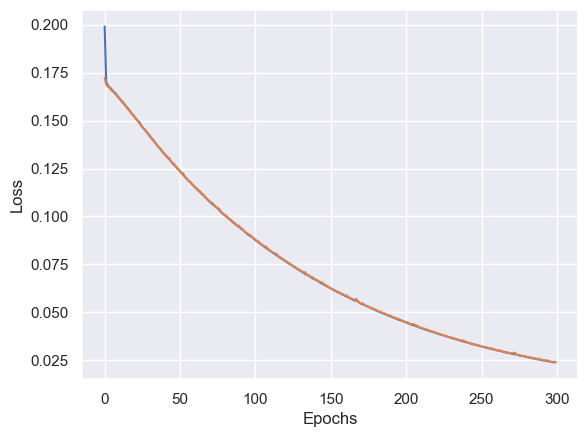

In [251]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [252]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\Alpha-Dwarfs.h5


In [253]:
predalpha = modelAlpha.predict(X_test)

 1/16 [>.............................] - ETA: 1s

16/16 [==============================] - 0s 2ms/step


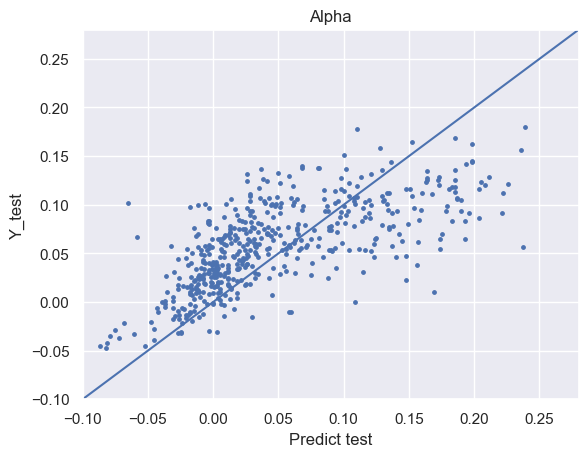

In [254]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [255]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test[columnTrain], predalpha))
print('Mean Absolute Error: ', mean_absolute_error(Y_test[columnTrain], predalpha))
print('Median Absolute Error: ', median_absolute_error(Y_test[columnTrain], predalpha))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test[columnTrain], predalpha) * 100, '%')

with open("scores/alphaScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test[columnTrain], predalpha)}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test[columnTrain], predalpha)}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test[columnTrain], predalpha)}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test[columnTrain], predalpha) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 44.0%
Mean Squared Error:  0.002493374604402265
Mean Absolute Error:  0.040155101548633214
Median Absolute Error:  0.03492236596345902
Mean Absolute Percentage Error:  81992292359597.97 %


In [256]:
Y_test['alpha_predict'] = predalpha

In [257]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s41_0026262    5165.86     4.476   -0.007        0.011   
iDR4_3_SPLUS-n02n26_0027037    5731.90     4.266   -0.153        0.003   
iDR4_3_SPLUS-n02n27_0012652    5883.89     4.244    0.018       -0.013   
iDR4_3_SPLUS-n01s38_0021247    5553.27     4.078    0.116       -0.015   
iDR4_3_SPLUS-n01s37_0039916    5281.96     4.407    0.057       -0.031   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0052_0030458   5767.40     4.324   -0.329        0.131   
iDR4_3_SPLUS-n01s37_0032532    5079.59     4.307   -0.235        0.011   
iDR4_3_SPLUS-n02n27_0016721    5671.28     4.385   -0.045       -0.012   
iDR4_3_STRIPE82-0001_0027439   5458.25     3.553   -0.413        0.051   
iDR4_3_SPLUS-n01s27_0024637    5508.74     4.225   -0.499        0.134   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n07s41_0026262  -0.05441  0.01777 -0.00575  0.01776 -0.03958   
iDR4_3_SPLUS-n02n26_0027037   0.01946  0.01651 -0.00447  0.01430 -0.00130   
iDR4_3_SPLUS-n02n27_0012652   0.00067 -0.00902  0.26882 -0.01945 -0.00811   
iDR4_3_SPLUS-n01s38_0021247   0.01421 -0.01505  0.14115 -0.00363  0.00871   
iDR4_3_SPLUS-n01s37_0039916  -0.01388 -0.01326  0.07569 -0.00113 -0.00467   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0052_0030458  0.06415  0.11581 -0.04293  0.20228  0.11763   
iDR4_3_SPLUS-n01s37_0032532  -0.08846  0.19101 -0.04492 -0.05606 -0.05711   
iDR4_3_SPLUS-n02n27_0016721  -0.02921 -0.01149  0.03796 -0.01192 -0.01303   
iDR4_3_STRIPE82-0001_0027439  0.02813  0.07228  0.10087  0.07800  0.04028   
iDR4_3_SPLUS-n01s27_0024637   0.18450  0.10242 -0.15403  0.17634  0.09665   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_SPLUS-n07s41_0026262   0.00848       0.023256  
iDR4_3_SPLUS-n02n26_0027037  -0.00525       0.029179  
iDR4_3_SPLUS-n02n27_0012652   0.05074       0.033529  
iDR4_3_SPLUS-n01s38_0021247   0.06575      -0.009150  
iDR4_3_SPLUS-n01s37_0039916   0.02812      -0.017965  
...                               ...            ...  
iDR4_3_STRIPE82-0052_0030458  0.02593       0.104479  
iDR4_3_SPLUS-n01s37_0032532  -0.03312       0.031162  
iDR4_3_SPLUS-n02n27_0016721  -0.00211       0.018065  
iDR4_3_STRIPE82-0001_0027439  0.01128       0.068635  
iDR4_3_SPLUS-n01s27_0024637  -0.00403       0.094628  

[505 rows x 11 columns]

In [258]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [259]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [270]:
modelCFE = training_model()
batchSize = 64
epochs = 300

In [271]:
# modelCFE=load_model('modelosNovos\\Lamost-MR\\CFE_Dwarfs.h5')
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/300


29/29 - 1s - loss: 0.1989 - val_loss: 0.1737 - 742ms/epoch - 26ms/step
Epoch 2/300
29/29 - 0s - loss: 0.1726 - val_loss: 0.1702 - 192ms/epoch - 7ms/step
Epoch 3/300
29/29 - 0s - loss: 0.1695 - val_loss: 0.1690 - 200ms/epoch - 7ms/step
Epoch 4/300
29/29 - 0s - loss: 0.1684 - val_loss: 0.1681 - 185ms/epoch - 6ms/step
Epoch 5/300
29/29 - 0s - loss: 0.1677 - val_loss: 0.1678 - 179ms/epoch - 6ms/step
Epoch 6/300
29/29 - 0s - loss: 0.1670 - val_loss: 0.1673 - 173ms/epoch - 6ms/step
Epoch 7/300
29/29 - 0s - loss: 0.1664 - val_loss: 0.1663 - 180ms/epoch - 6ms/step
Epoch 8/300
29/29 - 0s - loss: 0.1657 - val_loss: 0.1661 - 194ms/epoch - 7ms/step
Epoch 9/300
29/29 - 0s - loss: 0.1651 - val_loss: 0.1652 - 177ms/epoch - 6ms/step
Epoch 10/300
29/29 - 0s - loss: 0.1643 - val_loss: 0.1645 - 172ms/epoch - 6ms/step
Epoch 11/300
29/29 - 0s - loss: 0.1635 - val_loss: 0.1640 - 187ms/epoch - 6ms/step
Epoch 12/300
29/29 - 0s - loss: 0.1628 - val_loss: 0.1637 - 190ms/epoch - 7ms/step
Epoch 13/300
29/29 - 0s 

Text(0, 0.5, 'Loss')

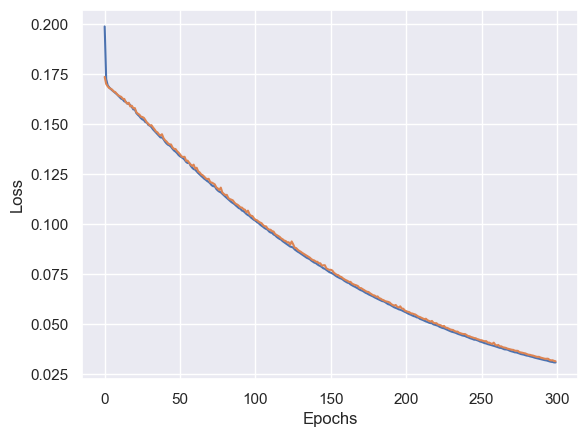

In [272]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [273]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CFE-Dwarfs.h5


In [274]:
predCFE = modelCFE.predict(X_test)

16/16 [==============================] - 0s 2ms/step


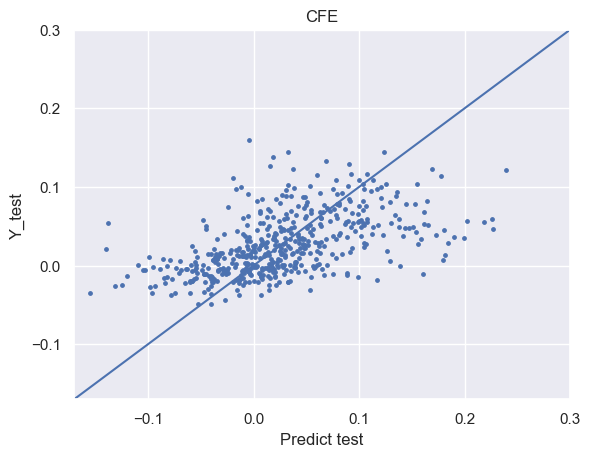

In [275]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [276]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test[columnTrain], predCFE))
print('Mean Absolute Error: ', mean_absolute_error(Y_test[columnTrain], predCFE))
print('Median Absolute Error: ', median_absolute_error(Y_test[columnTrain], predCFE))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test[columnTrain], predCFE) * 100, '%')

with open("scores/cfeScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test[columnTrain], predCFE)}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test[columnTrain], predCFE)}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test[columnTrain], predCFE)}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test[columnTrain], predCFE) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 21.0%
Mean Squared Error:  0.003978942618327199
Mean Absolute Error:  0.04328194861857416
Median Absolute Error:  0.03260575658321381
Mean Absolute Percentage Error:  251.23777577467146 %


In [277]:
Y_test['CFE_predict'] = predCFE

In [278]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s41_0026262    5165.86     4.476   -0.007        0.011   
iDR4_3_SPLUS-n02n26_0027037    5731.90     4.266   -0.153        0.003   
iDR4_3_SPLUS-n02n27_0012652    5883.89     4.244    0.018       -0.013   
iDR4_3_SPLUS-n01s38_0021247    5553.27     4.078    0.116       -0.015   
iDR4_3_SPLUS-n01s37_0039916    5281.96     4.407    0.057       -0.031   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0052_0030458   5767.40     4.324   -0.329        0.131   
iDR4_3_SPLUS-n01s37_0032532    5079.59     4.307   -0.235        0.011   
iDR4_3_SPLUS-n02n27_0016721    5671.28     4.385   -0.045       -0.012   
iDR4_3_STRIPE82-0001_0027439   5458.25     3.553   -0.413        0.051   
iDR4_3_SPLUS-n01s27_0024637    5508.74     4.225   -0.499        0.134   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n07s41_0026262  -0.05441  0.01777 -0.00575  0.01776 -0.03958   
iDR4_3_SPLUS-n02n26_0027037   0.01946  0.01651 -0.00447  0.01430 -0.00130   
iDR4_3_SPLUS-n02n27_0012652   0.00067 -0.00902  0.26882 -0.01945 -0.00811   
iDR4_3_SPLUS-n01s38_0021247   0.01421 -0.01505  0.14115 -0.00363  0.00871   
iDR4_3_SPLUS-n01s37_0039916  -0.01388 -0.01326  0.07569 -0.00113 -0.00467   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0052_0030458  0.06415  0.11581 -0.04293  0.20228  0.11763   
iDR4_3_SPLUS-n01s37_0032532  -0.08846  0.19101 -0.04492 -0.05606 -0.05711   
iDR4_3_SPLUS-n02n27_0016721  -0.02921 -0.01149  0.03796 -0.01192 -0.01303   
iDR4_3_STRIPE82-0001_0027439  0.02813  0.07228  0.10087  0.07800  0.04028   
iDR4_3_SPLUS-n01s27_0024637   0.18450  0.10242 -0.15403  0.17634  0.09665   

                                ni_fe  alpha_predict  CFE_predict  
ID                                                                 
iDR4_3_SPLUS-n07s41_0026262   0.00848       0.023256     0.000920  
iDR4_3_SPLUS-n02n26_0027037  -0.00525       0.029179    -0.004603  
iDR4_3_SPLUS-n02n27_0012652   0.05074       0.033529     0.022557  
iDR4_3_SPLUS-n01s38_0021247   0.06575      -0.009150    -0.024778  
iDR4_3_SPLUS-n01s37_0039916   0.02812      -0.017965     0.012202  
...                               ...            ...          ...  
iDR4_3_STRIPE82-0052_0030458  0.02593       0.104479     0.060357  
iDR4_3_SPLUS-n01s37_0032532  -0.03312       0.031162    -0.004721  
iDR4_3_SPLUS-n02n27_0016721  -0.00211       0.018065    -0.003079  
iDR4_3_STRIPE82-0001_0027439  0.01128       0.068635     0.046474  
iDR4_3_SPLUS-n01s27_0024637  -0.00403       0.094628     0.028544  

[505 rows x 12 columns]

In [279]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [280]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [281]:
modelCAFE = training_model()
batchSize = 64
epochs = 300

In [282]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/300


29/29 - 1s - loss: 0.2716 - val_loss: 0.1771 - 864ms/epoch - 30ms/step
Epoch 2/300
29/29 - 0s - loss: 0.1719 - val_loss: 0.1695 - 294ms/epoch - 10ms/step
Epoch 3/300
29/29 - 0s - loss: 0.1697 - val_loss: 0.1691 - 279ms/epoch - 10ms/step
Epoch 4/300
29/29 - 0s - loss: 0.1693 - val_loss: 0.1687 - 239ms/epoch - 8ms/step
Epoch 5/300
29/29 - 0s - loss: 0.1686 - val_loss: 0.1683 - 233ms/epoch - 8ms/step
Epoch 6/300
29/29 - 0s - loss: 0.1681 - val_loss: 0.1680 - 223ms/epoch - 8ms/step
Epoch 7/300
29/29 - 0s - loss: 0.1676 - val_loss: 0.1675 - 268ms/epoch - 9ms/step
Epoch 8/300
29/29 - 0s - loss: 0.1671 - val_loss: 0.1672 - 224ms/epoch - 8ms/step
Epoch 9/300
29/29 - 0s - loss: 0.1666 - val_loss: 0.1664 - 209ms/epoch - 7ms/step
Epoch 10/300
29/29 - 0s - loss: 0.1660 - val_loss: 0.1663 - 263ms/epoch - 9ms/step
Epoch 11/300
29/29 - 0s - loss: 0.1656 - val_loss: 0.1656 - 224ms/epoch - 8ms/step
Epoch 12/300
29/29 - 0s - loss: 0.1651 - val_loss: 0.1662 - 215ms/epoch - 7ms/step
Epoch 13/300
29/29 - 0

Text(0, 0.5, 'Loss')

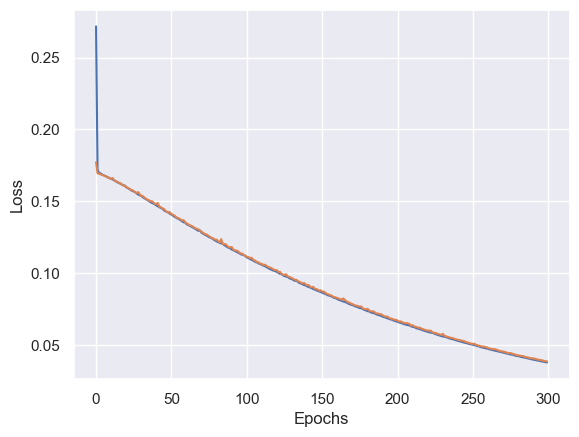

In [283]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [284]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CAFE-Dwarfs.h5


In [285]:
predCAFE = modelCAFE.predict(X_test)

16/16 [==============================] - 0s 2ms/step


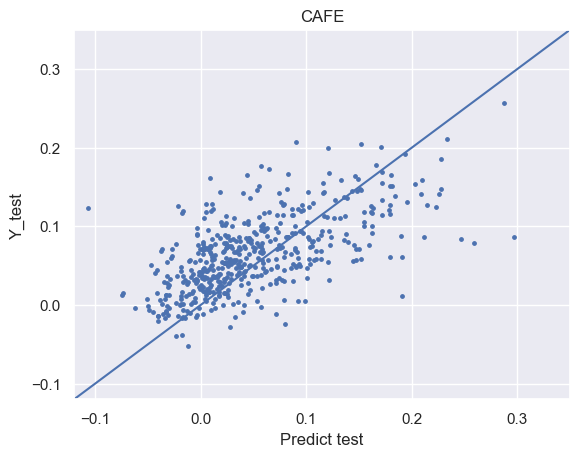

In [286]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [287]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test[columnTrain], predCAFE))
print('Mean Absolute Error: ', mean_absolute_error(Y_test[columnTrain], predCAFE))
print('Median Absolute Error: ', median_absolute_error(Y_test[columnTrain], predCAFE))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test[columnTrain], predCAFE) * 100, '%')

with open("scores/cafeScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test[columnTrain], predCAFE)}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test[columnTrain], predCAFE)}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test[columnTrain], predCAFE)}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test[columnTrain], predCAFE) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 32.0%
Mean Squared Error:  0.002837151530646174
Mean Absolute Error:  0.041551000093630636
Median Absolute Error:  0.034831788959503174
Mean Absolute Percentage Error:  446.096914545174 %


In [288]:
Y_test['CAFE_predict'] = predCAFE

In [289]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s41_0026262    5165.86     4.476   -0.007        0.011   
iDR4_3_SPLUS-n02n26_0027037    5731.90     4.266   -0.153        0.003   
iDR4_3_SPLUS-n02n27_0012652    5883.89     4.244    0.018       -0.013   
iDR4_3_SPLUS-n01s38_0021247    5553.27     4.078    0.116       -0.015   
iDR4_3_SPLUS-n01s37_0039916    5281.96     4.407    0.057       -0.031   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0052_0030458   5767.40     4.324   -0.329        0.131   
iDR4_3_SPLUS-n01s37_0032532    5079.59     4.307   -0.235        0.011   
iDR4_3_SPLUS-n02n27_0016721    5671.28     4.385   -0.045       -0.012   
iDR4_3_STRIPE82-0001_0027439   5458.25     3.553   -0.413        0.051   
iDR4_3_SPLUS-n01s27_0024637    5508.74     4.225   -0.499        0.134   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n07s41_0026262  -0.05441  0.01777 -0.00575  0.01776 -0.03958   
iDR4_3_SPLUS-n02n26_0027037   0.01946  0.01651 -0.00447  0.01430 -0.00130   
iDR4_3_SPLUS-n02n27_0012652   0.00067 -0.00902  0.26882 -0.01945 -0.00811   
iDR4_3_SPLUS-n01s38_0021247   0.01421 -0.01505  0.14115 -0.00363  0.00871   
iDR4_3_SPLUS-n01s37_0039916  -0.01388 -0.01326  0.07569 -0.00113 -0.00467   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0052_0030458  0.06415  0.11581 -0.04293  0.20228  0.11763   
iDR4_3_SPLUS-n01s37_0032532  -0.08846  0.19101 -0.04492 -0.05606 -0.05711   
iDR4_3_SPLUS-n02n27_0016721  -0.02921 -0.01149  0.03796 -0.01192 -0.01303   
iDR4_3_STRIPE82-0001_0027439  0.02813  0.07228  0.10087  0.07800  0.04028   
iDR4_3_SPLUS-n01s27_0024637   0.18450  0.10242 -0.15403  0.17634  0.09665   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n07s41_0026262   0.00848       0.023256     0.000920   
iDR4_3_SPLUS-n02n26_0027037  -0.00525       0.029179    -0.004603   
iDR4_3_SPLUS-n02n27_0012652   0.05074       0.033529     0.022557   
iDR4_3_SPLUS-n01s38_0021247   0.06575      -0.009150    -0.024778   
iDR4_3_SPLUS-n01s37_0039916   0.02812      -0.017965     0.012202   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0052_0030458  0.02593       0.104479     0.060357   
iDR4_3_SPLUS-n01s37_0032532  -0.03312       0.031162    -0.004721   
iDR4_3_SPLUS-n02n27_0016721  -0.00211       0.018065    -0.003079   
iDR4_3_STRIPE82-0001_0027439  0.01128       0.068635     0.046474   
iDR4_3_SPLUS-n01s27_0024637  -0.00403       0.094628     0.028544   

                              CAFE_predict  
ID                                          
iDR4_3_SPLUS-n07s41_0026262       0.038774  
iDR4_3_SPLUS-n02n26_0027037       0.029973  
iDR4_3_SPLUS-n02n27_0012652       0.035635  
iDR4_3_SPLUS-n01s38_0021247      -0.016751  
iDR4_3_SPLUS-n01s37_0039916      -0.007644  
...                                    ...  
iDR4_3_STRIPE82-0052_0030458      0.141996  
iDR4_3_SPLUS-n01s37_0032532       0.060387  
iDR4_3_SPLUS-n02n27_0016721       0.013320  
iDR4_3_STRIPE82-0001_0027439      0.071006  
iDR4_3_SPLUS-n01s27_0024637       0.124431  

[505 rows x 13 columns]

In [290]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [293]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [294]:
modelNFE = training_model()
batchSize = 64
epochs = 300

In [295]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/300


29/29 - 1s - loss: 0.3934 - val_loss: 0.1886 - 1s/epoch - 35ms/step
Epoch 2/300
29/29 - 0s - loss: 0.1807 - val_loss: 0.1780 - 244ms/epoch - 8ms/step
Epoch 3/300
29/29 - 0s - loss: 0.1775 - val_loss: 0.1772 - 223ms/epoch - 8ms/step
Epoch 4/300
29/29 - 0s - loss: 0.1765 - val_loss: 0.1765 - 210ms/epoch - 7ms/step
Epoch 5/300
29/29 - 0s - loss: 0.1759 - val_loss: 0.1762 - 204ms/epoch - 7ms/step
Epoch 6/300
29/29 - 0s - loss: 0.1754 - val_loss: 0.1759 - 215ms/epoch - 7ms/step
Epoch 7/300
29/29 - 0s - loss: 0.1750 - val_loss: 0.1756 - 213ms/epoch - 7ms/step
Epoch 8/300
29/29 - 0s - loss: 0.1746 - val_loss: 0.1754 - 207ms/epoch - 7ms/step
Epoch 9/300
29/29 - 0s - loss: 0.1742 - val_loss: 0.1748 - 201ms/epoch - 7ms/step
Epoch 10/300
29/29 - 0s - loss: 0.1740 - val_loss: 0.1746 - 198ms/epoch - 7ms/step
Epoch 11/300
29/29 - 0s - loss: 0.1735 - val_loss: 0.1744 - 195ms/epoch - 7ms/step
Epoch 12/300
29/29 - 0s - loss: 0.1731 - val_loss: 0.1736 - 191ms/epoch - 7ms/step
Epoch 13/300
29/29 - 0s - l

Text(0, 0.5, 'Loss')

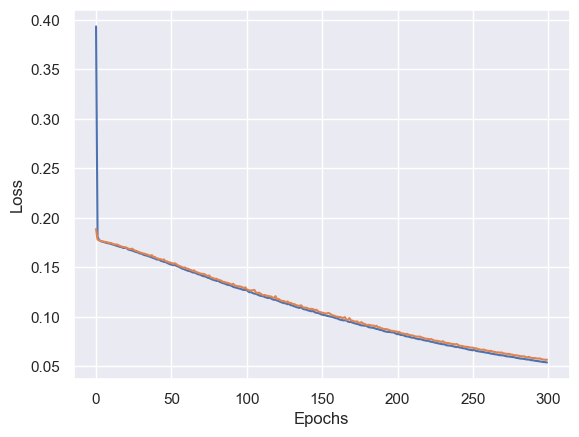

In [296]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [297]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NFE-Dwarfs.h5


In [298]:
predNFE = modelNFE.predict(X_test)

16/16 [==============================] - 0s 2ms/step


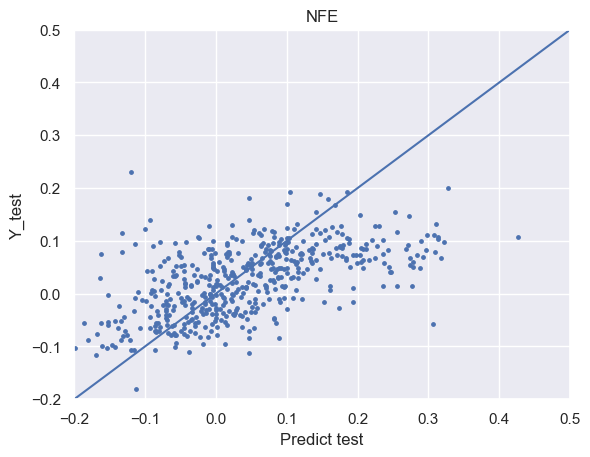

In [299]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [300]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test[columnTrain], predNFE))
print('Mean Absolute Error: ', mean_absolute_error(Y_test[columnTrain], predNFE))
print('Median Absolute Error: ', median_absolute_error(Y_test[columnTrain], predNFE))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test[columnTrain], predNFE) * 100, '%')

with open("scores/nfeScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test[columnTrain], predNFE)}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test[columnTrain], predNFE)}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test[columnTrain], predNFE)}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test[columnTrain], predNFE) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 30.0%
Mean Squared Error:  0.008913168802672235
Mean Absolute Error:  0.07111800492569803
Median Absolute Error:  0.05435665618538857
Mean Absolute Percentage Error:  381.0949790477586 %


In [301]:
Y_test['NFE_predict'] = predNFE

In [302]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s41_0026262    5165.86     4.476   -0.007        0.011   
iDR4_3_SPLUS-n02n26_0027037    5731.90     4.266   -0.153        0.003   
iDR4_3_SPLUS-n02n27_0012652    5883.89     4.244    0.018       -0.013   
iDR4_3_SPLUS-n01s38_0021247    5553.27     4.078    0.116       -0.015   
iDR4_3_SPLUS-n01s37_0039916    5281.96     4.407    0.057       -0.031   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0052_0030458   5767.40     4.324   -0.329        0.131   
iDR4_3_SPLUS-n01s37_0032532    5079.59     4.307   -0.235        0.011   
iDR4_3_SPLUS-n02n27_0016721    5671.28     4.385   -0.045       -0.012   
iDR4_3_STRIPE82-0001_0027439   5458.25     3.553   -0.413        0.051   
iDR4_3_SPLUS-n01s27_0024637    5508.74     4.225   -0.499        0.134   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n07s41_0026262  -0.05441  0.01777 -0.00575  0.01776 -0.03958   
iDR4_3_SPLUS-n02n26_0027037   0.01946  0.01651 -0.00447  0.01430 -0.00130   
iDR4_3_SPLUS-n02n27_0012652   0.00067 -0.00902  0.26882 -0.01945 -0.00811   
iDR4_3_SPLUS-n01s38_0021247   0.01421 -0.01505  0.14115 -0.00363  0.00871   
iDR4_3_SPLUS-n01s37_0039916  -0.01388 -0.01326  0.07569 -0.00113 -0.00467   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0052_0030458  0.06415  0.11581 -0.04293  0.20228  0.11763   
iDR4_3_SPLUS-n01s37_0032532  -0.08846  0.19101 -0.04492 -0.05606 -0.05711   
iDR4_3_SPLUS-n02n27_0016721  -0.02921 -0.01149  0.03796 -0.01192 -0.01303   
iDR4_3_STRIPE82-0001_0027439  0.02813  0.07228  0.10087  0.07800  0.04028   
iDR4_3_SPLUS-n01s27_0024637   0.18450  0.10242 -0.15403  0.17634  0.09665   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n07s41_0026262   0.00848       0.023256     0.000920   
iDR4_3_SPLUS-n02n26_0027037  -0.00525       0.029179    -0.004603   
iDR4_3_SPLUS-n02n27_0012652   0.05074       0.033529     0.022557   
iDR4_3_SPLUS-n01s38_0021247   0.06575      -0.009150    -0.024778   
iDR4_3_SPLUS-n01s37_0039916   0.02812      -0.017965     0.012202   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0052_0030458  0.02593       0.104479     0.060357   
iDR4_3_SPLUS-n01s37_0032532  -0.03312       0.031162    -0.004721   
iDR4_3_SPLUS-n02n27_0016721  -0.00211       0.018065    -0.003079   
iDR4_3_STRIPE82-0001_0027439  0.01128       0.068635     0.046474   
iDR4_3_SPLUS-n01s27_0024637  -0.00403       0.094628     0.028544   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_SPLUS-n07s41_0026262       0.038774    -0.019960  
iDR4_3_SPLUS-n02n26_0027037       0.029973     0.049614  
iDR4_3_SPLUS-n02n27_0012652       0.035635     0.084332  
iDR4_3_SPLUS-n01s38_0021247      -0.016751     0.154635  
iDR4_3_SPLUS-n01s37_0039916      -0.007644     0.061366  
...                                    ...          ...  
iDR4_3_STRIPE82-0052_0030458      0.141996     0.019886  
iDR4_3_SPLUS-n01s37_0032532       0.060387     0.053672  
iDR4_3_SPLUS-n02n27_0016721       0.013320     0.050262  
iDR4_3_STRIPE82-0001_0027439      0.071006     0.038264  
iDR4_3_SPLUS-n01s27_0024637       0.124431    -0.102711  

[505 rows x 14 columns]

In [303]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [304]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [305]:
modelMGFE = training_model()
batchSize = 64
epochs = 300

In [306]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/300


29/29 - 1s - loss: 0.2119 - val_loss: 0.1770 - 863ms/epoch - 30ms/step
Epoch 2/300
29/29 - 0s - loss: 0.1736 - val_loss: 0.1718 - 216ms/epoch - 7ms/step
Epoch 3/300
29/29 - 0s - loss: 0.1716 - val_loss: 0.1711 - 203ms/epoch - 7ms/step
Epoch 4/300
29/29 - 0s - loss: 0.1707 - val_loss: 0.1707 - 195ms/epoch - 7ms/step
Epoch 5/300
29/29 - 0s - loss: 0.1698 - val_loss: 0.1697 - 201ms/epoch - 7ms/step
Epoch 6/300
29/29 - 0s - loss: 0.1691 - val_loss: 0.1690 - 195ms/epoch - 7ms/step
Epoch 7/300
29/29 - 0s - loss: 0.1682 - val_loss: 0.1683 - 189ms/epoch - 7ms/step
Epoch 8/300
29/29 - 0s - loss: 0.1673 - val_loss: 0.1680 - 194ms/epoch - 7ms/step
Epoch 9/300
29/29 - 0s - loss: 0.1665 - val_loss: 0.1667 - 189ms/epoch - 7ms/step
Epoch 10/300
29/29 - 0s - loss: 0.1656 - val_loss: 0.1666 - 194ms/epoch - 7ms/step
Epoch 11/300
29/29 - 0s - loss: 0.1651 - val_loss: 0.1649 - 191ms/epoch - 7ms/step
Epoch 12/300
29/29 - 0s - loss: 0.1641 - val_loss: 0.1641 - 201ms/epoch - 7ms/step
Epoch 13/300
29/29 - 0s 

Text(0, 0.5, 'Loss')

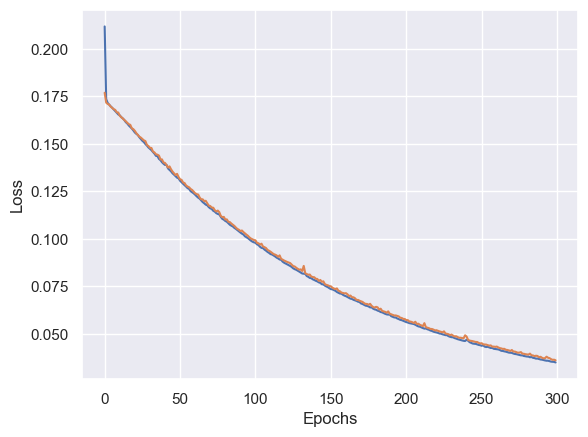

In [307]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [308]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\MGFE-Dwarfs.h5


In [309]:
predMGFE = modelMGFE.predict(X_test)

16/16 [==============================] - 0s 2ms/step


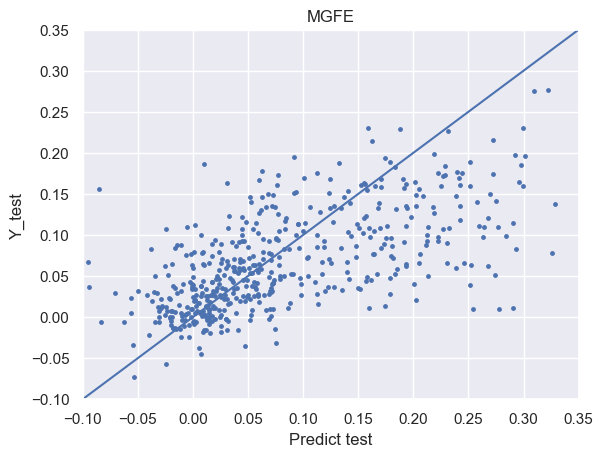

In [310]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.35)
plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [311]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test[columnTrain], predMGFE))
print('Mean Absolute Error: ', mean_absolute_error(Y_test[columnTrain], predMGFE))
print('Median Absolute Error: ', median_absolute_error(Y_test[columnTrain], predMGFE))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test[columnTrain], predMGFE) * 100, '%')

with open("scores/mgfeScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test[columnTrain], predMGFE)}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test[columnTrain], predMGFE)}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test[columnTrain], predMGFE)}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test[columnTrain], predMGFE) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 38.0%
Mean Squared Error:  0.005360269032411117
Mean Absolute Error:  0.05359098587899574
Median Absolute Error:  0.037440225353240965
Mean Absolute Percentage Error:  332.1520372547172 %


In [312]:
Y_test['MGFE_predict'] = predMGFE

In [313]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s41_0026262    5165.86     4.476   -0.007        0.011   
iDR4_3_SPLUS-n02n26_0027037    5731.90     4.266   -0.153        0.003   
iDR4_3_SPLUS-n02n27_0012652    5883.89     4.244    0.018       -0.013   
iDR4_3_SPLUS-n01s38_0021247    5553.27     4.078    0.116       -0.015   
iDR4_3_SPLUS-n01s37_0039916    5281.96     4.407    0.057       -0.031   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0052_0030458   5767.40     4.324   -0.329        0.131   
iDR4_3_SPLUS-n01s37_0032532    5079.59     4.307   -0.235        0.011   
iDR4_3_SPLUS-n02n27_0016721    5671.28     4.385   -0.045       -0.012   
iDR4_3_STRIPE82-0001_0027439   5458.25     3.553   -0.413        0.051   
iDR4_3_SPLUS-n01s27_0024637    5508.74     4.225   -0.499        0.134   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n07s41_0026262  -0.05441  0.01777 -0.00575  0.01776 -0.03958   
iDR4_3_SPLUS-n02n26_0027037   0.01946  0.01651 -0.00447  0.01430 -0.00130   
iDR4_3_SPLUS-n02n27_0012652   0.00067 -0.00902  0.26882 -0.01945 -0.00811   
iDR4_3_SPLUS-n01s38_0021247   0.01421 -0.01505  0.14115 -0.00363  0.00871   
iDR4_3_SPLUS-n01s37_0039916  -0.01388 -0.01326  0.07569 -0.00113 -0.00467   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0052_0030458  0.06415  0.11581 -0.04293  0.20228  0.11763   
iDR4_3_SPLUS-n01s37_0032532  -0.08846  0.19101 -0.04492 -0.05606 -0.05711   
iDR4_3_SPLUS-n02n27_0016721  -0.02921 -0.01149  0.03796 -0.01192 -0.01303   
iDR4_3_STRIPE82-0001_0027439  0.02813  0.07228  0.10087  0.07800  0.04028   
iDR4_3_SPLUS-n01s27_0024637   0.18450  0.10242 -0.15403  0.17634  0.09665   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n07s41_0026262   0.00848       0.023256     0.000920   
iDR4_3_SPLUS-n02n26_0027037  -0.00525       0.029179    -0.004603   
iDR4_3_SPLUS-n02n27_0012652   0.05074       0.033529     0.022557   
iDR4_3_SPLUS-n01s38_0021247   0.06575      -0.009150    -0.024778   
iDR4_3_SPLUS-n01s37_0039916   0.02812      -0.017965     0.012202   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0052_0030458  0.02593       0.104479     0.060357   
iDR4_3_SPLUS-n01s37_0032532  -0.03312       0.031162    -0.004721   
iDR4_3_SPLUS-n02n27_0016721  -0.00211       0.018065    -0.003079   
iDR4_3_STRIPE82-0001_0027439  0.01128       0.068635     0.046474   
iDR4_3_SPLUS-n01s27_0024637  -0.00403       0.094628     0.028544   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_SPLUS-n07s41_0026262       0.038774    -0.019960      0.043207  
iDR4_3_SPLUS-n02n26_0027037       0.029973     0.049614      0.004638  
iDR4_3_SPLUS-n02n27_0012652       0.035635     0.084332      0.007524  
iDR4_3_SPLUS-n01s38_0021247      -0.016751     0.154635     -0.024794  
iDR4_3_SPLUS-n01s37_0039916      -0.007644     0.061366      0.010443  
...                                    ...          ...           ...  
iDR4_3_STRIPE82-0052_0030458      0.141996     0.019886      0.134991  
iDR4_3_SPLUS-n01s37_0032532       0.060387     0.053672      0.023564  
iDR4_3_SPLUS-n02n27_0016721       0.013320     0.050262     -0.014510  
iDR4_3_STRIPE82-0001_0027439      0.071006     0.038264      0.063828  
iDR4_3_SPLUS-n01s27_0024637       0.124431    -0.102711      0.110809  

[505 rows x 15 columns]

In [314]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [315]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [316]:
modelSIFE = training_model()
batchSize = 64
epochs = 300

In [317]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/300


29/29 - 1s - loss: 0.1893 - val_loss: 0.1757 - 821ms/epoch - 28ms/step
Epoch 2/300
29/29 - 0s - loss: 0.1703 - val_loss: 0.1690 - 255ms/epoch - 9ms/step
Epoch 3/300
29/29 - 0s - loss: 0.1687 - val_loss: 0.1685 - 206ms/epoch - 7ms/step
Epoch 4/300
29/29 - 0s - loss: 0.1675 - val_loss: 0.1674 - 201ms/epoch - 7ms/step
Epoch 5/300
29/29 - 0s - loss: 0.1667 - val_loss: 0.1664 - 194ms/epoch - 7ms/step
Epoch 6/300
29/29 - 0s - loss: 0.1657 - val_loss: 0.1656 - 191ms/epoch - 7ms/step
Epoch 7/300
29/29 - 0s - loss: 0.1652 - val_loss: 0.1650 - 198ms/epoch - 7ms/step
Epoch 8/300
29/29 - 0s - loss: 0.1641 - val_loss: 0.1642 - 195ms/epoch - 7ms/step
Epoch 9/300
29/29 - 0s - loss: 0.1635 - val_loss: 0.1638 - 188ms/epoch - 6ms/step
Epoch 10/300
29/29 - 0s - loss: 0.1620 - val_loss: 0.1618 - 187ms/epoch - 6ms/step
Epoch 11/300
29/29 - 0s - loss: 0.1609 - val_loss: 0.1608 - 186ms/epoch - 6ms/step
Epoch 12/300
29/29 - 0s - loss: 0.1600 - val_loss: 0.1606 - 187ms/epoch - 6ms/step
Epoch 13/300
29/29 - 0s 

Text(0, 0.5, 'Loss')

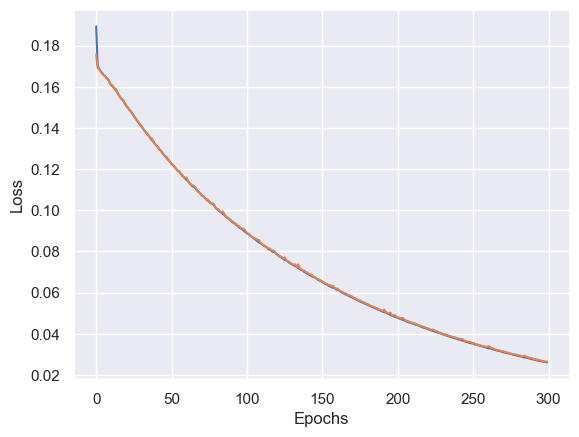

In [318]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [319]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\SIFE-Dwarfs.h5


In [320]:
predSIFE = modelSIFE.predict(X_test)

16/16 [==============================] - 0s 2ms/step


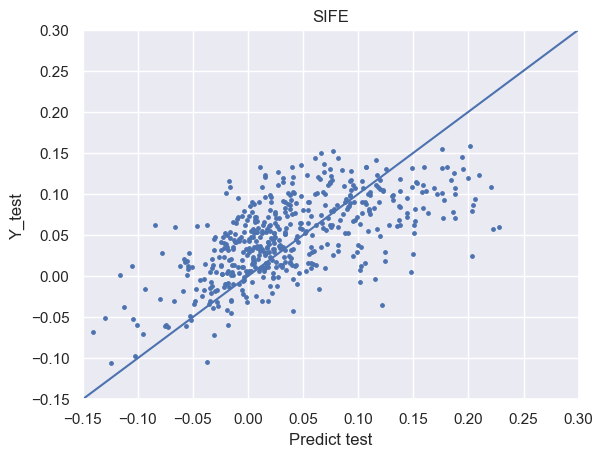

In [321]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [322]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test[columnTrain], predSIFE))
print('Mean Absolute Error: ', mean_absolute_error(Y_test[columnTrain], predSIFE))
print('Median Absolute Error: ', median_absolute_error(Y_test[columnTrain], predSIFE))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test[columnTrain], predSIFE) * 100, '%')

with open("scores/sifeScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test[columnTrain], predSIFE)}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test[columnTrain], predSIFE)}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test[columnTrain], predSIFE)}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test[columnTrain], predSIFE) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 37.0%
Mean Squared Error:  0.002795458584293353
Mean Absolute Error:  0.04180518418055404
Median Absolute Error:  0.03571766022957861
Mean Absolute Percentage Error:  286.866165062643 %


In [323]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [324]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s41_0026262    5165.86     4.476   -0.007        0.011   
iDR4_3_SPLUS-n02n26_0027037    5731.90     4.266   -0.153        0.003   
iDR4_3_SPLUS-n02n27_0012652    5883.89     4.244    0.018       -0.013   
iDR4_3_SPLUS-n01s38_0021247    5553.27     4.078    0.116       -0.015   
iDR4_3_SPLUS-n01s37_0039916    5281.96     4.407    0.057       -0.031   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0052_0030458   5767.40     4.324   -0.329        0.131   
iDR4_3_SPLUS-n01s37_0032532    5079.59     4.307   -0.235        0.011   
iDR4_3_SPLUS-n02n27_0016721    5671.28     4.385   -0.045       -0.012   
iDR4_3_STRIPE82-0001_0027439   5458.25     3.553   -0.413        0.051   
iDR4_3_SPLUS-n01s27_0024637    5508.74     4.225   -0.499        0.134   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n07s41_0026262  -0.05441  0.01777 -0.00575  0.01776 -0.03958   
iDR4_3_SPLUS-n02n26_0027037   0.01946  0.01651 -0.00447  0.01430 -0.00130   
iDR4_3_SPLUS-n02n27_0012652   0.00067 -0.00902  0.26882 -0.01945 -0.00811   
iDR4_3_SPLUS-n01s38_0021247   0.01421 -0.01505  0.14115 -0.00363  0.00871   
iDR4_3_SPLUS-n01s37_0039916  -0.01388 -0.01326  0.07569 -0.00113 -0.00467   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0052_0030458  0.06415  0.11581 -0.04293  0.20228  0.11763   
iDR4_3_SPLUS-n01s37_0032532  -0.08846  0.19101 -0.04492 -0.05606 -0.05711   
iDR4_3_SPLUS-n02n27_0016721  -0.02921 -0.01149  0.03796 -0.01192 -0.01303   
iDR4_3_STRIPE82-0001_0027439  0.02813  0.07228  0.10087  0.07800  0.04028   
iDR4_3_SPLUS-n01s27_0024637   0.18450  0.10242 -0.15403  0.17634  0.09665   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n07s41_0026262   0.00848       0.023256     0.000920   
iDR4_3_SPLUS-n02n26_0027037  -0.00525       0.029179    -0.004603   
iDR4_3_SPLUS-n02n27_0012652   0.05074       0.033529     0.022557   
iDR4_3_SPLUS-n01s38_0021247   0.06575      -0.009150    -0.024778   
iDR4_3_SPLUS-n01s37_0039916   0.02812      -0.017965     0.012202   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0052_0030458  0.02593       0.104479     0.060357   
iDR4_3_SPLUS-n01s37_0032532  -0.03312       0.031162    -0.004721   
iDR4_3_SPLUS-n02n27_0016721  -0.00211       0.018065    -0.003079   
iDR4_3_STRIPE82-0001_0027439  0.01128       0.068635     0.046474   
iDR4_3_SPLUS-n01s27_0024637  -0.00403       0.094628     0.028544   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_SPLUS-n07s41_0026262       0.038774    -0.019960      0.043207   
iDR4_3_SPLUS-n02n26_0027037       0.029973     0.049614      0.004638   
iDR4_3_SPLUS-n02n27_0012652       0.035635     0.084332      0.007524   
iDR4_3_SPLUS-n01s38_0021247      -0.016751     0.154635     -0.024794   
iDR4_3_SPLUS-n01s37_0039916      -0.007644     0.061366      0.010443   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0052_0030458      0.141996     0.019886      0.134991   
iDR4_3_SPLUS-n01s37_0032532       0.060387     0.053672      0.023564   
iDR4_3_SPLUS-n02n27_0016721       0.013320     0.050262     -0.014510   
iDR4_3_STRIPE82-0001_0027439      0.071006     0.038264      0.063828   
iDR4_3_SPLUS-n01s27_0024637       0.124431    -0.102711      0.110809   

                              SIFE_predict  
ID                                          
iDR4_3_SPLUS-n07s41_0026262      -0.003862  
iDR4_3_SPLUS-n02n26_0027037       0.025719  
iDR4_3_SPLUS-n02n27_0012652       0.0

In [325]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [326]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Dwarfs"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [327]:
modelNIFE = training_model()
batchSize = 64
epochs = 300

In [328]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = epochs, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = batchSize, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/300


29/29 - 1s - loss: 0.1866 - val_loss: 0.1688 - 834ms/epoch - 29ms/step
Epoch 2/300
29/29 - 0s - loss: 0.1693 - val_loss: 0.1675 - 221ms/epoch - 8ms/step
Epoch 3/300
29/29 - 0s - loss: 0.1672 - val_loss: 0.1663 - 204ms/epoch - 7ms/step
Epoch 4/300
29/29 - 0s - loss: 0.1666 - val_loss: 0.1656 - 195ms/epoch - 7ms/step
Epoch 5/300
29/29 - 0s - loss: 0.1664 - val_loss: 0.1649 - 191ms/epoch - 7ms/step
Epoch 6/300
29/29 - 0s - loss: 0.1660 - val_loss: 0.1642 - 188ms/epoch - 6ms/step
Epoch 7/300
29/29 - 0s - loss: 0.1645 - val_loss: 0.1635 - 195ms/epoch - 7ms/step
Epoch 8/300
29/29 - 0s - loss: 0.1633 - val_loss: 0.1625 - 187ms/epoch - 6ms/step
Epoch 9/300
29/29 - 0s - loss: 0.1626 - val_loss: 0.1618 - 191ms/epoch - 7ms/step
Epoch 10/300
29/29 - 0s - loss: 0.1616 - val_loss: 0.1609 - 188ms/epoch - 6ms/step
Epoch 11/300
29/29 - 0s - loss: 0.1608 - val_loss: 0.1606 - 194ms/epoch - 7ms/step
Epoch 12/300
29/29 - 0s - loss: 0.1599 - val_loss: 0.1594 - 186ms/epoch - 6ms/step
Epoch 13/300
29/29 - 0s 

Text(0, 0.5, 'Loss')

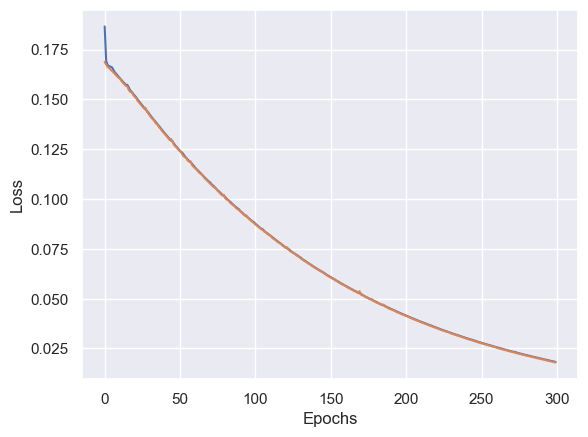

In [329]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [330]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NIFE-Dwarfs.h5


In [331]:
predNIFE = modelNIFE.predict(X_test)

16/16 [==============================] - 0s 2ms/step


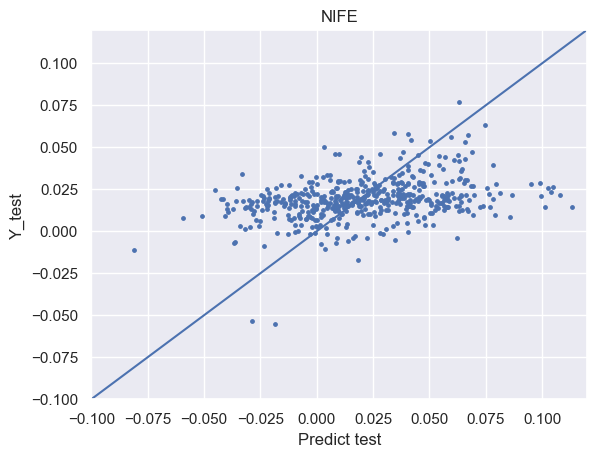

In [332]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [333]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
print('Mean Squared Error: ', mean_squared_error(Y_test[columnTrain], predNIFE))
print('Mean Absolute Error: ', mean_absolute_error(Y_test[columnTrain], predNIFE))
print('Median Absolute Error: ', median_absolute_error(Y_test[columnTrain], predNIFE))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(Y_test[columnTrain], predNIFE) * 100, '%')

with open("scores/nifeScores.txt", "a") as myfile:
    myfile.write(f"Modelo: {Parametro}-{AouG}\n")
    myfile.write(f"batchSize: {batchSize}\n")
    myfile.write(f"epochs: {epochs}\n")
    myfile.write(f"R2: {score*100}%\n")
    myfile.write(f"MSE: {mean_squared_error(Y_test[columnTrain], predNIFE)}\n")
    myfile.write(f"MAE: {mean_absolute_error(Y_test[columnTrain], predNIFE)}\n")
    myfile.write(f"MedAE: {median_absolute_error(Y_test[columnTrain], predNIFE)}\n")
    myfile.write(f"MAPE: {mean_absolute_percentage_error(Y_test[columnTrain], predNIFE) * 100}%\n")
    myfile.write(f"---------------------------\n\n")

The accuracy of our model is 11.0%
Mean Squared Error:  0.0008597200338849761
Mean Absolute Error:  0.023158795925760624
Median Absolute Error:  0.01819469541370869
Mean Absolute Percentage Error:  714.3684808987698 %


In [334]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [335]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s41_0026262    5165.86     4.476   -0.007        0.011   
iDR4_3_SPLUS-n02n26_0027037    5731.90     4.266   -0.153        0.003   
iDR4_3_SPLUS-n02n27_0012652    5883.89     4.244    0.018       -0.013   
iDR4_3_SPLUS-n01s38_0021247    5553.27     4.078    0.116       -0.015   
iDR4_3_SPLUS-n01s37_0039916    5281.96     4.407    0.057       -0.031   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0052_0030458   5767.40     4.324   -0.329        0.131   
iDR4_3_SPLUS-n01s37_0032532    5079.59     4.307   -0.235        0.011   
iDR4_3_SPLUS-n02n27_0016721    5671.28     4.385   -0.045       -0.012   
iDR4_3_STRIPE82-0001_0027439   5458.25     3.553   -0.413        0.051   
iDR4_3_SPLUS-n01s27_0024637    5508.74     4.225   -0.499        0.134   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n07s41_0026262  -0.05441  0.01777 -0.00575  0.01776 -0.03958   
iDR4_3_SPLUS-n02n26_0027037   0.01946  0.01651 -0.00447  0.01430 -0.00130   
iDR4_3_SPLUS-n02n27_0012652   0.00067 -0.00902  0.26882 -0.01945 -0.00811   
iDR4_3_SPLUS-n01s38_0021247   0.01421 -0.01505  0.14115 -0.00363  0.00871   
iDR4_3_SPLUS-n01s37_0039916  -0.01388 -0.01326  0.07569 -0.00113 -0.00467   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0052_0030458  0.06415  0.11581 -0.04293  0.20228  0.11763   
iDR4_3_SPLUS-n01s37_0032532  -0.08846  0.19101 -0.04492 -0.05606 -0.05711   
iDR4_3_SPLUS-n02n27_0016721  -0.02921 -0.01149  0.03796 -0.01192 -0.01303   
iDR4_3_STRIPE82-0001_0027439  0.02813  0.07228  0.10087  0.07800  0.04028   
iDR4_3_SPLUS-n01s27_0024637   0.18450  0.10242 -0.15403  0.17634  0.09665   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_SPLUS-n07s41_0026262   0.00848       0.023256     0.000920   
iDR4_3_SPLUS-n02n26_0027037  -0.00525       0.029179    -0.004603   
iDR4_3_SPLUS-n02n27_0012652   0.05074       0.033529     0.022557   
iDR4_3_SPLUS-n01s38_0021247   0.06575      -0.009150    -0.024778   
iDR4_3_SPLUS-n01s37_0039916   0.02812      -0.017965     0.012202   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0052_0030458  0.02593       0.104479     0.060357   
iDR4_3_SPLUS-n01s37_0032532  -0.03312       0.031162    -0.004721   
iDR4_3_SPLUS-n02n27_0016721  -0.00211       0.018065    -0.003079   
iDR4_3_STRIPE82-0001_0027439  0.01128       0.068635     0.046474   
iDR4_3_SPLUS-n01s27_0024637  -0.00403       0.094628     0.028544   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_SPLUS-n07s41_0026262       0.038774    -0.019960      0.043207   
iDR4_3_SPLUS-n02n26_0027037       0.029973     0.049614      0.004638   
iDR4_3_SPLUS-n02n27_0012652       0.035635     0.084332      0.007524   
iDR4_3_SPLUS-n01s38_0021247      -0.016751     0.154635     -0.024794   
iDR4_3_SPLUS-n01s37_0039916      -0.007644     0.061366      0.010443   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0052_0030458      0.141996     0.019886      0.134991   
iDR4_3_SPLUS-n01s37_0032532       0.060387     0.053672      0.023564   
iDR4_3_SPLUS-n02n27_0016721       0.013320     0.050262     -0.014510   
iDR4_3_STRIPE82-0001_0027439      0.071006     0.038264      0.063828   
iDR4_3_SPLUS-n01s27_0024637       0.124431    -0.102711      0.110809   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_SPLUS-n07s41_0026262      -0.003862      0.021086  
iDR4_3_SPLUS-n02n26_0027037       0.0257

In [336]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

# Giants

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import encoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr

import seaborn as sns; sns.set()

NomeBase = "LamostMedium"

Loaded  10 encoders.


In [2]:
from keras.layers import Input, Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras import regularizers

import math
import keras
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from keras.models import Model

from pympler import muppy, summary

In [3]:
def training_model():
    input_x0 = Input(shape=(66,), name='inp0')
    encoded0 = Dense(224, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(input_x0)
    a0=LeakyReLU(alpha=0.1)(encoded0)
    encoded1 = Dense(320, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a0)
    a1=LeakyReLU(alpha=0.1)(encoded1)
    encoded2 = Dense(608, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a1)
    a2=LeakyReLU(alpha=0.1)(encoded2)
    encoded3 = Dense(320, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a2)
    a3=LeakyReLU(alpha=0.1)(encoded3)
    encoded4 = Dense(128, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a3)
    a4=LeakyReLU(alpha=0.1)(encoded4)
    encoded5 = Dense(64, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a4)
    a5=LeakyReLU(alpha=0.1)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "HeUniform", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [4]:
GigCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Giants.csv", index_col = 'ID')

In [5]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s25_0030049   0.3133  0.4522  1.1633  1.3005  1.7816  2.0018   
iDR4_3_SPLUS-n01s26_0002285   0.3294  0.4663  1.2745  1.4139  1.8921  2.1016   
iDR4_3_SPLUS-n01s26_0009057   0.2861  0.5898  1.3165  1.5061  2.0577  2.2205   
iDR4_3_SPLUS-n01s26_0011242   0.2485  0.6875  1.3797  1.6612  2.2692  2.4530   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0169_0035197  0.2690  0.6372  1.3798  1.6699  2.2881  2.4889   
iDR4_3_STRIPE82-0170_0003456  0.2620  0.7486  1.6325  2.0468  2.7619  2.9739   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s25_0030049   2.4067  2.4838  2.6055  2.6960  ...   5000.93   
iDR4_3_SPLUS-n01s26_0002285   2.5627  2.6461  2.7764  2.8519  ...   4864.11   
iDR4_3_SPLUS-n01s26_0009057   2.8009  2.8785  2.9984  3.0839  ...   4902.90   
iDR4_3_SPLUS-n01s26_0011242   2.8211  3.0473  2.9786  3.3283  ...   4862.38   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0169_0035197  3.0563  3.1318  3.3034  3.4023  ...   4888.76   
iDR4_3_STRIPE82-0170_0003456  3.4152  3.6347  3.6426  4.0637  ...   4593.41   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201     0.09857   
iDR4_3_SPLUS-n01s25_0030049      3.375   -0.370        0.109     0.04871   
iDR4_3_SPLUS-n01s26_0002285      3.327   -0.356        0.168     0.12134   
iDR4_3_SPLUS-n01s26_0009057      3.429   -0.132        0.118     0.13662   
iDR4_3_SPLUS-n01s26_0011242      3.308    0.104        0.002     0.06467   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0169_0035197     3.445    0.123    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0003456     2.642    0.181    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026      0.20527    -0.05186     0.28106     0.16079   
iDR4_3_SPLUS-n01s25_0030049      0.13283    -0.10485     0.15748     0.07473   
iDR4_3_SPLUS-n01s26_0002285      0.15676    -0.08000     0.26085     0.08862   
iDR4_3_SPLUS-n01s26_0009057      0.11936     0.05200     0.19804     0.08521   
iDR4_3_SPLUS-n01s26_0011242      0.00800     0.18223     0.03295     0.00689   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0169_0035197 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [6]:
xtrain = GigCores.iloc[:, :66]

In [7]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [8]:
ytrain = GigCores[columnYtrain]

In [9]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffMedium')

In [10]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [11]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [12]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [13]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0005_0035429   4681.19     2.439   -0.532        0.199   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_SPLUS-s02s25_0031332    4870.06     3.058   -0.421        0.187   
iDR4_3_STRIPE82-0130_0034080   4952.20     3.542   -0.231        0.143   
iDR4_3_SPLUS-s02s25_0034233    4968.90     2.733   -0.526        0.061   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n03s28_0023758    4924.41     3.291    0.087       -0.012   
iDR4_3_SPLUS-s02s23_0019010    4914.76     3.323    0.020        0.011   
iDR4_3_STRIPE82-0026_0045166   4912.66     2.764   -0.657        0.202   
iDR4_3_SPLUS-n06s41_0014662    4944.27     3.305    0.026        0.007   
iDR4_3_STRIPE82-0101_0091026   4864.97     2.427   -0.409    -9999.000   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_STRIPE82-0005_0035429     0.13893     0.16746     0.02678     0.27778   
iDR4_3_STRIPE82-0130_0030550     0.19900     0.09656     0.07049     0.21585   
iDR4_3_SPLUS-s02s25_0031332      0.16542     0.19304    -0.03170     0.26501   
iDR4_3_STRIPE82-0130_0034080     0.12637     0.12494    -0.01804     0.23144   
iDR4_3_SPLUS-s02s25_0034233      0.06011     0.09712     0.13121     0.10617   
...                                  ...         ...         ...         ...   
iDR4_3_SPLUS-n03s28_0023758     -0.04965     0.01119     0.08620    -0.00105   
iDR4_3_SPLUS-s02s23_0019010      0.00351     0.02594     0.09526     0.04463   
iDR4_3_STRIPE82-0026_0045166     0.15279     0.16344     0.10230     0.27082   
iDR4_3_SPLUS-n06s41_0014662      0.03078     0.03188     0.18393     0.03691   
iDR4_3_STRIPE82-0101_0091026 -9999.00000 -9999.00000 -9999.00000 -9999.00000   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_STRIPE82-0005_0035429     0.19652     0.09616    -0.233154  
iDR4_3_STRIPE82-0130_0030550     0.17819     0.10353    -0.141684  
iDR4_3_SPLUS-s02s25_0031332      0.15857     0.07585    -0.009344  
iDR4_3_STRIPE82-0130_0034080     0.11278     0.07433     0.087992  
iDR4_3_SPLUS-s02s25_0034233      0.06406     0.05813     0.107781  
...                                  ...         ...          ...  
iDR4_3_SPLUS-n03s28_0023758     -0.01670    -0.01140     0.055061  
iDR4_3_SPLUS-s02s23_0019010     -0.00072     0.01798     0.043626  
iDR4_3_STRIPE82-0026_0045166     0.20976     0.13203     0.041137  
iDR4_3_SPLUS-n06s41_0014662      0.00107     0.07044     0.078595  
iDR4_3_STRIPE82-0101_0091026 -9999.00000 -9999.00000    -0.015375  

[1615 rows x 11 columns]

### Teff

In [14]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [16]:
modelTEFF = training_model()
batchSize = 32
epochs = 200

In [17]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 1000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 4s - loss: 0.2589 - val_loss: 0.2049 - 4s/epoch - 2s/step
Epoch 2/3000
2/2 - 0s - loss: 0.1932 - val_loss: 0.1990 - 47ms/epoch - 24ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.1947 - val_loss: 0.1982 - 46ms/epoch - 23ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.1914 - val_loss: 0.1872 - 49ms/epoch - 25ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.1832 - val_loss: 0.1824 - 50ms/epoch - 25ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.1795 - val_loss: 0.1803 - 46ms/epoch - 23ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.1796 - val_loss: 0.1815 - 44ms/epoch - 22ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.1800 - val_loss: 0.1802 - 44ms/epoch - 22ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.1774 - val_loss: 0.1802 - 44ms/epoch - 22ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.1763 - val_loss: 0.1808 - 46ms/epoch - 23ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.1761 - val_loss: 0.1809 - 42ms/epoch - 21ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.1762 - val_loss: 0.1804 - 42ms/epoch - 21ms/step
Epoch 13/3000
2/2 - 0s - loss

Text(0, 0.5, 'Loss')

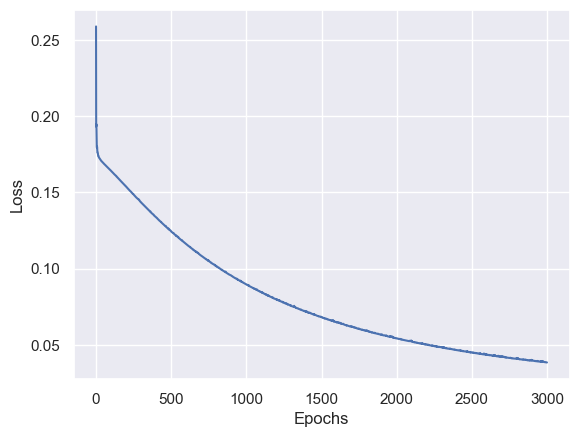

In [18]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

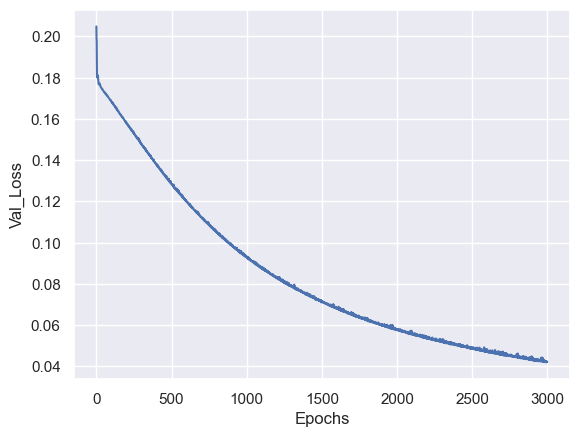

In [19]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [28]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\TEFF-Giants.h5


In [21]:
predTeff = modelTEFF.predict(X_test)

15/15 [==============================] - 0s 3ms/step


In [22]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0048095    5084.30     2.330   -1.756        0.256   
iDR4_3_STRIPE82-0026_0045166   4922.22     2.712   -0.663    -9999.000   
iDR4_3_SPLUS-n01s28_0002841    4710.90     2.455   -0.604        0.222   
iDR4_3_SPLUS-s02s25_0034233    4953.38     2.882   -0.495        0.102   
iDR4_3_STRIPE82-0130_0030276   4263.48     1.718   -0.602        0.226   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0005_0015991   4860.04     3.230    0.068        0.005   
iDR4_3_STRIPE82-0101_0019214   4493.41     2.238   -0.288    -9999.000   
iDR4_3_STRIPE82-0026_0048087   4712.80     2.454   -0.286        0.189   
iDR4_3_SPLUS-s02s25_0026562    5097.48     3.303   -0.752        0.228   
iDR4_3_SPLUS-n06s43_0032581    4583.99     2.642    0.050        0.091   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0048095      0.12968     0.34637     0.02945     0.29304   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0002841      0.13310     0.18026    -0.01243     0.29841   
iDR4_3_SPLUS-s02s25_0034233      0.10046     0.09662     0.07306     0.15447   
iDR4_3_STRIPE82-0130_0030276     0.10701     0.18066     0.07755     0.29491   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0005_0015991     0.04761     0.02536     0.20860     0.02371   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0048087     0.20348     0.10972     0.06001     0.26422   
iDR4_3_SPLUS-s02s25_0026562      0.15213     0.25617    -0.13215     0.31048   
iDR4_3_SPLUS-n06s43_0032581      0.12747     0.04792     0.17042     0.15356   

                                   si_fe       ni_fe  teffEncoded  
ID                                                                 
iDR4_3_SPLUS-n07s42_0048095      0.24040    -0.02379     0.244530  
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000     0.052466  
iDR4_3_SPLUS-n01s28_0002841      0.21124     0.07754    -0.197948  
iDR4_3_SPLUS-s02s25_0034233      0.08545     0.06571     0.089390  
iDR4_3_STRIPE82-0130_0030276     0.21803     0.08403    -0.728138  
...                                  ...         ...          ...  
iDR4_3_STRIPE82-0005_0015991     0.00185     0.04031    -0.021217  
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000    -0.455672  
iDR4_3_STRIPE82-0026_0048087     0.18473     0.08091    -0.195696  
iDR4_3_SPLUS-s02s25_0026562      0.17923     0.08623     0.260148  
iDR4_3_SPLUS-n06s43_0032581      0.08233     0.06687    -0.348335  

[449 rows x 11 columns]

In [23]:
predaux = encoder.decode_DataFrame(predTeff, 'teffMedium')
Y_test['TEFF_PredictDecoded'] = predaux

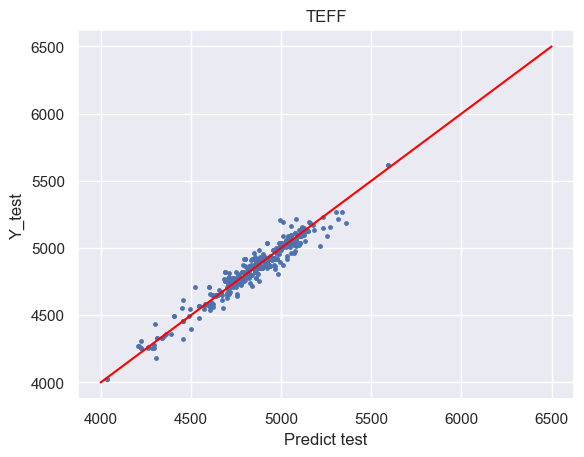

In [24]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 6500], [4000, 6500], c='red')

In [25]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [26]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0048095    5084.30     2.330   -1.756        0.256   
iDR4_3_STRIPE82-0026_0045166   4922.22     2.712   -0.663    -9999.000   
iDR4_3_SPLUS-n01s28_0002841    4710.90     2.455   -0.604        0.222   
iDR4_3_SPLUS-s02s25_0034233    4953.38     2.882   -0.495        0.102   
iDR4_3_STRIPE82-0130_0030276   4263.48     1.718   -0.602        0.226   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0005_0015991   4860.04     3.230    0.068        0.005   
iDR4_3_STRIPE82-0101_0019214   4493.41     2.238   -0.288    -9999.000   
iDR4_3_STRIPE82-0026_0048087   4712.80     2.454   -0.286        0.189   
iDR4_3_SPLUS-s02s25_0026562    5097.48     3.303   -0.752        0.228   
iDR4_3_SPLUS-n06s43_0032581    4583.99     2.642    0.050        0.091   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0048095      0.12968     0.34637     0.02945     0.29304   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0002841      0.13310     0.18026    -0.01243     0.29841   
iDR4_3_SPLUS-s02s25_0034233      0.10046     0.09662     0.07306     0.15447   
iDR4_3_STRIPE82-0130_0030276     0.10701     0.18066     0.07755     0.29491   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0005_0015991     0.04761     0.02536     0.20860     0.02371   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0048087     0.20348     0.10972     0.06001     0.26422   
iDR4_3_SPLUS-s02s25_0026562      0.15213     0.25617    -0.13215     0.31048   
iDR4_3_SPLUS-n06s43_0032581      0.12747     0.04792     0.17042     0.15356   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0048095      0.24040    -0.02379     0.244530   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000     0.052466   
iDR4_3_SPLUS-n01s28_0002841      0.21124     0.07754    -0.197948   
iDR4_3_SPLUS-s02s25_0034233      0.08545     0.06571     0.089390   
iDR4_3_STRIPE82-0130_0030276     0.21803     0.08403    -0.728138   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0005_0015991     0.00185     0.04031    -0.021217   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000    -0.455672   
iDR4_3_STRIPE82-0026_0048087     0.18473     0.08091    -0.195696   
iDR4_3_SPLUS-s02s25_0026562      0.17923     0.08623     0.260148   
iDR4_3_SPLUS-n06s43_0032581      0.08233     0.06687    -0.348335   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n07s42_0048095           5214.414551  
iDR4_3_STRIPE82-0026_0045166          4919.829590  
iDR4_3_SPLUS-n01s28_0002841           4787.844238  
iDR4_3_SPLUS-s02s25_0034233           4988.571289  
iDR4_3_STRIPE82-0130_0030276          4265.732910  
...                                           ...  
iDR4_3_STRIPE82-0005_0015991          4778.034180  
iDR4_3_STRIPE82-0101_0019214          4545.962891  
iDR4_3_STRIPE82-0026_0048087          4741.270508  
iDR4_3_SPLUS-s02s25_0026562           5097.572266  
iDR4_3_SPLUS-n06s43_0032581           4581.278320  

[449 rows x 12 columns]

In [27]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [29]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [30]:
modelLOGG = training_model()
batchSize = 32
epochs = 200

In [31]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 6.0666 - val_loss: 5.0268 - 583ms/epoch - 583ms/step
Epoch 2/2000
1/1 - 0s - loss: 5.0303 - val_loss: 4.1165 - 107ms/epoch - 107ms/step
Epoch 3/2000
1/1 - 0s - loss: 4.1092 - val_loss: 3.3439 - 68ms/epoch - 68ms/step
Epoch 4/2000
1/1 - 0s - loss: 3.3188 - val_loss: 2.7081 - 51ms/epoch - 51ms/step
Epoch 5/2000
1/1 - 0s - loss: 2.6624 - val_loss: 2.2019 - 50ms/epoch - 50ms/step
Epoch 6/2000
1/1 - 0s - loss: 2.1324 - val_loss: 1.8121 - 54ms/epoch - 54ms/step
Epoch 7/2000
1/1 - 0s - loss: 1.7158 - val_loss: 1.5246 - 46ms/epoch - 46ms/step
Epoch 8/2000
1/1 - 0s - loss: 1.4040 - val_loss: 1.3238 - 48ms/epoch - 48ms/step
Epoch 9/2000
1/1 - 0s - loss: 1.1853 - val_loss: 1.1933 - 45ms/epoch - 45ms/step
Epoch 10/2000
1/1 - 0s - loss: 1.0451 - val_loss: 1.1102 - 48ms/epoch - 48ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.9624 - val_loss: 1.0560 - 52ms/epoch - 52ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.9187 - val_loss: 1.0155 - 41ms/epoch - 41ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.8

Text(0, 0.5, 'Loss')

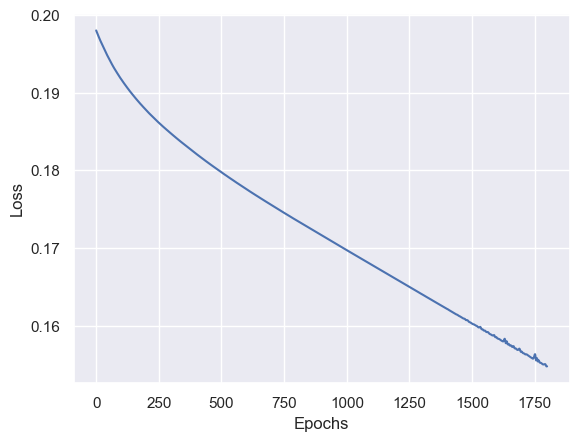

In [32]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

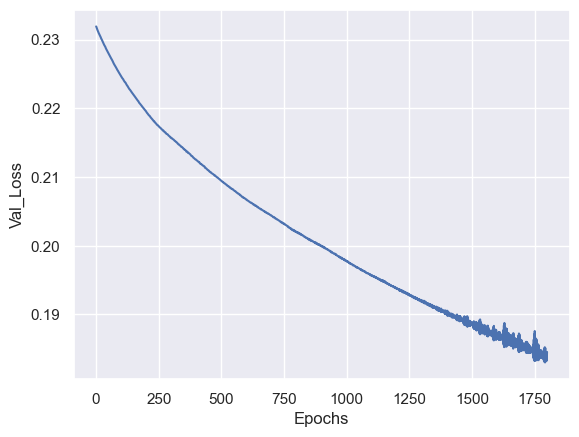

In [33]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [34]:
modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\LOGG-Giants.h5


In [35]:
predlogg = modelLOGG.predict(X_test)

 1/15 [=>............................] - ETA: 0s

15/15 [==============================] - 0s 2ms/step


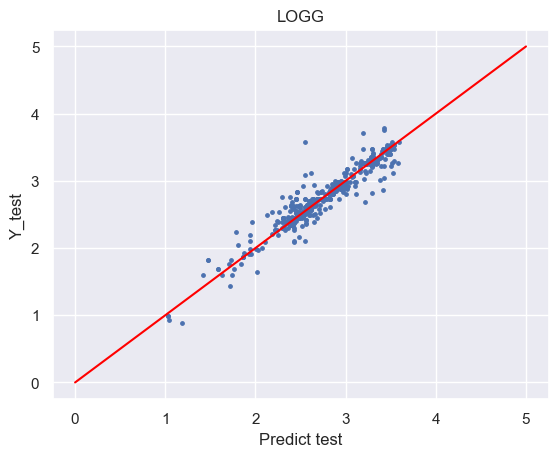

In [36]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
#plt.xlim(3.8, 4.8)
#plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([0, 5], [0, 5], c='red')

plt.grid(True)

In [37]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


In [38]:
Y_test['LOGG_Predict'] = predlogg

In [39]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0048095    5084.30     2.330   -1.756        0.256   
iDR4_3_STRIPE82-0026_0045166   4922.22     2.712   -0.663    -9999.000   
iDR4_3_SPLUS-n01s28_0002841    4710.90     2.455   -0.604        0.222   
iDR4_3_SPLUS-s02s25_0034233    4953.38     2.882   -0.495        0.102   
iDR4_3_STRIPE82-0130_0030276   4263.48     1.718   -0.602        0.226   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0005_0015991   4860.04     3.230    0.068        0.005   
iDR4_3_STRIPE82-0101_0019214   4493.41     2.238   -0.288    -9999.000   
iDR4_3_STRIPE82-0026_0048087   4712.80     2.454   -0.286        0.189   
iDR4_3_SPLUS-s02s25_0026562    5097.48     3.303   -0.752        0.228   
iDR4_3_SPLUS-n06s43_0032581    4583.99     2.642    0.050        0.091   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0048095      0.12968     0.34637     0.02945     0.29304   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0002841      0.13310     0.18026    -0.01243     0.29841   
iDR4_3_SPLUS-s02s25_0034233      0.10046     0.09662     0.07306     0.15447   
iDR4_3_STRIPE82-0130_0030276     0.10701     0.18066     0.07755     0.29491   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0005_0015991     0.04761     0.02536     0.20860     0.02371   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0048087     0.20348     0.10972     0.06001     0.26422   
iDR4_3_SPLUS-s02s25_0026562      0.15213     0.25617    -0.13215     0.31048   
iDR4_3_SPLUS-n06s43_0032581      0.12747     0.04792     0.17042     0.15356   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0048095      0.24040    -0.02379     0.244530   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000     0.052466   
iDR4_3_SPLUS-n01s28_0002841      0.21124     0.07754    -0.197948   
iDR4_3_SPLUS-s02s25_0034233      0.08545     0.06571     0.089390   
iDR4_3_STRIPE82-0130_0030276     0.21803     0.08403    -0.728138   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0005_0015991     0.00185     0.04031    -0.021217   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000    -0.455672   
iDR4_3_STRIPE82-0026_0048087     0.18473     0.08091    -0.195696   
iDR4_3_SPLUS-s02s25_0026562      0.17923     0.08623     0.260148   
iDR4_3_SPLUS-n06s43_0032581      0.08233     0.06687    -0.348335   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_SPLUS-n07s42_0048095           5214.414551      2.612923  
iDR4_3_STRIPE82-0026_0045166          4919.829590      2.728715  
iDR4_3_SPLUS-n01s28_0002841           4787.844238      2.467403  
iDR4_3_SPLUS-s02s25_0034233           4988.571289      2.842010  
iDR4_3_STRIPE82-0130_0030276          4265.732910      1.439348  
...                                           ...           ...  
iDR4_3_STRIPE82-0005_0015991          4778.034180      3.118953  
iDR4_3_STRIPE82-0101_0019214          4545.962891      2.404386  
iDR4_3_STRIPE82-0026_0048087          4741.270508      2.632808  
iDR4_3_SPLUS-s02s25_0026562           5097.572266      3.352474  
iDR4_3_SPLUS-n06s43_0032581           4581.278320      2.643116  

[449 rows x 13 columns]

In [40]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [41]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [42]:
modelFEH = training_model()
batchSize = 32
epochs = 200

In [43]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 1.1455 - val_loss: 0.6921 - 655ms/epoch - 655ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.7710 - val_loss: 0.4544 - 75ms/epoch - 75ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.5159 - val_loss: 0.3206 - 72ms/epoch - 72ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.3634 - val_loss: 0.2617 - 71ms/epoch - 71ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2853 - val_loss: 0.2522 - 63ms/epoch - 63ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2590 - val_loss: 0.2661 - 61ms/epoch - 61ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2601 - val_loss: 0.2833 - 57ms/epoch - 57ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.2692 - val_loss: 0.2927 - 56ms/epoch - 56ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.2749 - val_loss: 0.2916 - 59ms/epoch - 59ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2735 - val_loss: 0.2814 - 54ms/epoch - 54ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2650 - val_loss: 0.2670 - 53ms/epoch - 53ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.2525 - val_loss: 0.2519 - 53ms/epoch - 53ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.239

Text(0, 0.5, 'Loss')

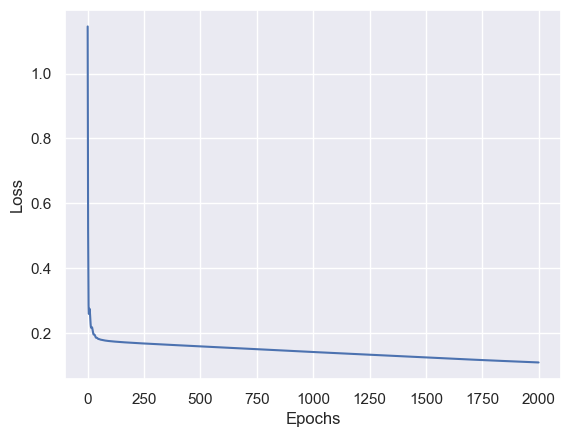

In [44]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

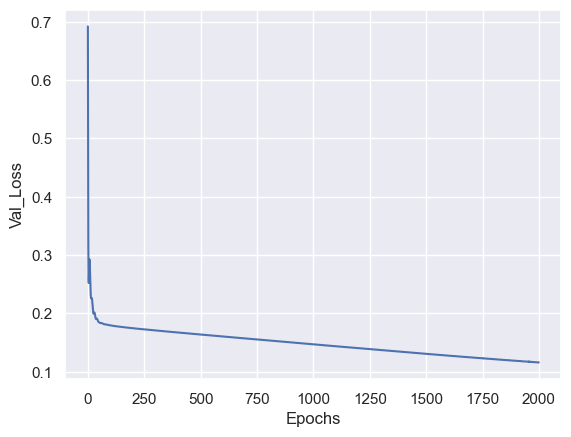

In [45]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [46]:
modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\FEH-Giants.h5


In [47]:
predfeh = modelFEH.predict(X_test)

 1/15 [=>............................] - ETA: 0s

15/15 [==============================] - 0s 4ms/step


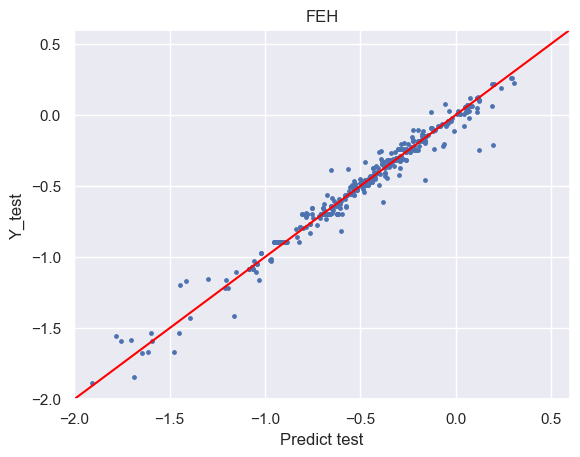

In [48]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-2, 0.6)
plt.ylim(-2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [49]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 97.0%


In [50]:
Y_test['FEH_Predict'] = predfeh

In [51]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n07s42_0048095    5084.30     2.330   -1.756        0.256   
iDR4_3_STRIPE82-0026_0045166   4922.22     2.712   -0.663    -9999.000   
iDR4_3_SPLUS-n01s28_0002841    4710.90     2.455   -0.604        0.222   
iDR4_3_SPLUS-s02s25_0034233    4953.38     2.882   -0.495        0.102   
iDR4_3_STRIPE82-0130_0030276   4263.48     1.718   -0.602        0.226   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0005_0015991   4860.04     3.230    0.068        0.005   
iDR4_3_STRIPE82-0101_0019214   4493.41     2.238   -0.288    -9999.000   
iDR4_3_STRIPE82-0026_0048087   4712.80     2.454   -0.286        0.189   
iDR4_3_SPLUS-s02s25_0026562    5097.48     3.303   -0.752        0.228   
iDR4_3_SPLUS-n06s43_0032581    4583.99     2.642    0.050        0.091   

                                    c_fe       ca_fe        n_fe       mg_fe  \
ID                                                                             
iDR4_3_SPLUS-n07s42_0048095      0.12968     0.34637     0.02945     0.29304   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_SPLUS-n01s28_0002841      0.13310     0.18026    -0.01243     0.29841   
iDR4_3_SPLUS-s02s25_0034233      0.10046     0.09662     0.07306     0.15447   
iDR4_3_STRIPE82-0130_0030276     0.10701     0.18066     0.07755     0.29491   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0005_0015991     0.04761     0.02536     0.20860     0.02371   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0026_0048087     0.20348     0.10972     0.06001     0.26422   
iDR4_3_SPLUS-s02s25_0026562      0.15213     0.25617    -0.13215     0.31048   
iDR4_3_SPLUS-n06s43_0032581      0.12747     0.04792     0.17042     0.15356   

                                   si_fe       ni_fe  teffEncoded  \
ID                                                                  
iDR4_3_SPLUS-n07s42_0048095      0.24040    -0.02379     0.244530   
iDR4_3_STRIPE82-0026_0045166 -9999.00000 -9999.00000     0.052466   
iDR4_3_SPLUS-n01s28_0002841      0.21124     0.07754    -0.197948   
iDR4_3_SPLUS-s02s25_0034233      0.08545     0.06571     0.089390   
iDR4_3_STRIPE82-0130_0030276     0.21803     0.08403    -0.728138   
...                                  ...         ...          ...   
iDR4_3_STRIPE82-0005_0015991     0.00185     0.04031    -0.021217   
iDR4_3_STRIPE82-0101_0019214 -9999.00000 -9999.00000    -0.455672   
iDR4_3_STRIPE82-0026_0048087     0.18473     0.08091    -0.195696   
iDR4_3_SPLUS-s02s25_0026562      0.17923     0.08623     0.260148   
iDR4_3_SPLUS-n06s43_0032581      0.08233     0.06687    -0.348335   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_SPLUS-n07s42_0048095           5214.414551      2.612923    -1.593177  
iDR4_3_STRIPE82-0026_0045166          4919.829590      2.728715    -0.696621  
iDR4_3_SPLUS-n01s28_0002841           4787.844238      2.467403    -0.628348  
iDR4_3_SPLUS-s02s25_0034233           4988.571289      2.842010    -0.487238  
iDR4_3_STRIPE82-0130_0030276          4265.732910      1.439348    -0.819666  
...                                           ...           ...          ...  
iDR4_3_STRIPE82-0005_0015991          4778.034180      3.118953     0.028043  
iDR4_3_STRIPE82-0101_0019214          4545.962891      2.404386    -0.202714  
iDR4_3_STRIPE82-0026_0048087          4741.270508      2.632808    -0.240005  
iDR4_3_SPLUS-s02s25_0026562           5097.572266      3.352474    -0.652629  
iDR4_3_SPLUS-n06s43_0032581           4581.278320      2.643116     0.058042  

[449 rows x 14 columns]

In [52]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros Parametros

In [4]:
GigCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostMedium-Colors-Giants.csv", index_col = 'ID')

In [5]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s25_0030049   0.3133  0.4522  1.1633  1.3005  1.7816  2.0018   
iDR4_3_SPLUS-n01s26_0002285   0.3294  0.4663  1.2745  1.4139  1.8921  2.1016   
iDR4_3_SPLUS-n01s26_0009057   0.2861  0.5898  1.3165  1.5061  2.0577  2.2205   
iDR4_3_SPLUS-n01s26_0011242   0.2485  0.6875  1.3797  1.6612  2.2692  2.4530   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0169_0035197  0.2690  0.6372  1.3798  1.6699  2.2881  2.4889   
iDR4_3_STRIPE82-0170_0003456  0.2620  0.7486  1.6325  2.0468  2.7619  2.9739   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s25_0030049   2.4067  2.4838  2.6055  2.6960  ...   5000.93   
iDR4_3_SPLUS-n01s26_0002285   2.5627  2.6461  2.7764  2.8519  ...   4864.11   
iDR4_3_SPLUS-n01s26_0009057   2.8009  2.8785  2.9984  3.0839  ...   4902.90   
iDR4_3_SPLUS-n01s26_0011242   2.8211  3.0473  2.9786  3.3283  ...   4862.38   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   5001.81   
iDR4_3_STRIPE82-0169_0035197  3.0563  3.1318  3.3034  3.4023  ...   4888.76   
iDR4_3_STRIPE82-0170_0003456  3.4152  3.6347  3.6426  4.0637  ...   4593.41   

                              logg_cnn  feh_cnn  alpha_m_cnn        c_fe  \
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201     0.09857   
iDR4_3_SPLUS-n01s25_0030049      3.375   -0.370        0.109     0.04871   
iDR4_3_SPLUS-n01s26_0002285      3.327   -0.356        0.168     0.12134   
iDR4_3_SPLUS-n01s26_0009057      3.429   -0.132        0.118     0.13662   
iDR4_3_SPLUS-n01s26_0011242      3.308    0.104        0.002     0.06467   
...                                ...      ...          ...         ...   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143     0.07077   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419     3.432   -0.578    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0169_0035197     3.445    0.123    -9999.000 -9999.00000   
iDR4_3_STRIPE82-0170_0003456     2.642    0.181    -9999.000 -9999.00000   

                                   ca_fe        n_fe       mg_fe       si_fe  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026      0.20527    -0.05186     0.28106     0.16079   
iDR4_3_SPLUS-n01s25_0030049      0.13283    -0.10485     0.15748     0.07473   
iDR4_3_SPLUS-n01s26_0002285      0.15676    -0.08000     0.26085     0.08862   
iDR4_3_SPLUS-n01s26_0009057      0.11936     0.05200     0.19804     0.08521   
iDR4_3_SPLUS-n01s26_0011242      0.00800     0.18223     0.03295     0.00689   
...                                  ...         ...         ...         ...   
iDR4_3_STRIPE82-0168_0021419     0.17212    -0.15093     0.20247     0.09235   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0168_0021419 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIPE82-0169_0035197 -9999.00000 -9999.00000 -9999.00000 -9999.00000   
iDR4_3_STRIP

In [6]:
GigCoresParams = GigCores.loc[GigCores['alpha_m_cnn'] != -9999]

In [7]:
GigCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n01s18_0035026   0.4026  0.4729  1.1554  1.2477  1.7334  1.9207   
iDR4_3_SPLUS-n01s25_0030049   0.3133  0.4522  1.1633  1.3005  1.7816  2.0018   
iDR4_3_SPLUS-n01s26_0002285   0.3294  0.4663  1.2745  1.4139  1.8921  2.1016   
iDR4_3_SPLUS-n01s26_0009057   0.2861  0.5898  1.3165  1.5061  2.0577  2.2205   
iDR4_3_SPLUS-n01s26_0011242   0.2485  0.6875  1.3797  1.6612  2.2692  2.4530   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0168_0011946  0.3329  0.5624  1.1757  1.3186  1.8714  2.0605   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   
iDR4_3_STRIPE82-0168_0021419  0.3469  0.4564  1.0782  1.1702  1.6522  1.8723   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n01s18_0035026   2.3068  2.4067  2.2530  2.6837  ...   5043.06   
iDR4_3_SPLUS-n01s25_0030049   2.4067  2.4838  2.6055  2.6960  ...   5000.93   
iDR4_3_SPLUS-n01s26_0002285   2.5627  2.6461  2.7764  2.8519  ...   4864.11   
iDR4_3_SPLUS-n01s26_0009057   2.8009  2.8785  2.9984  3.0839  ...   4902.90   
iDR4_3_SPLUS-n01s26_0011242   2.8211  3.0473  2.9786  3.3283  ...   4862.38   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0168_0011946  2.5632  2.6539  2.7989  2.8394  ...   4987.04   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4986.79   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   
iDR4_3_STRIPE82-0168_0021419  2.2561  2.3356  2.4986  2.5592  ...   4992.75   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n01s18_0035026      3.203   -0.518        0.201  0.09857   
iDR4_3_SPLUS-n01s25_0030049      3.375   -0.370        0.109  0.04871   
iDR4_3_SPLUS-n01s26_0002285      3.327   -0.356        0.168  0.12134   
iDR4_3_SPLUS-n01s26_0009057      3.429   -0.132        0.118  0.13662   
iDR4_3_SPLUS-n01s26_0011242      3.308    0.104        0.002  0.06467   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0168_0011946     3.309   -0.313        0.163  0.11010   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197  0.10864   
iDR4_3_STRIPE82-0168_0021419     3.371   -0.605        0.197  0.10864   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143  0.07077   
iDR4_3_STRIPE82-0168_0021419     3.462   -0.531        0.143  0.07077   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n01s18_0035026   0.20527 -0.05186  0.28106  0.16079  0.06973  
iDR4_3_SPLUS-n01s25_0030049   0.13283 -0.10485  0.15748  0.07473  0.06743  
iDR4_3_SPLUS-n01s26_0002285   0.15676 -0.08000  0.26085  0.08862  0.05935  
iDR4_3_SPLUS-n01s26_0009057   0.11936  0.05200  0.19804  0.08521  0.06657  
iDR4_3_SPLUS-n01s26_0011242   0.00800  0.18223  0.03295  0.00689  0.05561  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0168_0011946  0.15580  0.01234  0.25676  0.12517  0.05413  
iDR4_3_STRIPE82-0168_0021419  0.19329 -0.16436  0.27598  0.13263  0.10786  
iDR4_3_STRIPE82-0168_0021419  0.19329 -0.16436  0.27598  0.13263  0.10786  
iDR4_3_STRIPE82-0168_0021419  0.17212 -0.15093  0.20247  0.09235  0.07628  
iDR4_3_STRIPE82-0168_0021419  0.17212 -0.15093  0.20247  0.09235  0.07628  

[1885 rows x 76 column

In [8]:
print('cfe =', GigCoresParams['c_fe'].min())
print('cafe = ', GigCoresParams['ca_fe'].min())
print('nfe = ', GigCoresParams['n_fe'].min())
print('mgfe = ', GigCoresParams['mg_fe'].min())
print('sife = ', GigCoresParams['si_fe'].min())
print('nife = ', GigCoresParams['ni_fe'].min())

cfe = -0.8645
cafe =  -0.08675
nfe =  -0.26151
mgfe =  -0.09373
sife =  -0.05048
nife =  -0.13236


In [9]:
xtrain = GigCoresParams.iloc[:, :66]

In [10]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [11]:
ytrain = GigCoresParams[columnYtrain]

In [12]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [13]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [14]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [15]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0045166   5031.39     2.927   -0.598        0.147   
iDR4_3_STRIPE82-0008_0040040   4743.41     2.715   -0.185        0.058   
iDR4_3_SPLUS-n02s28_0004144    4637.61     2.618   -0.232        0.122   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_STRIPE82-0028_0025061   4991.37     3.249   -0.343        0.052   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0132_0018365   4912.94     3.016   -0.194        0.032   
iDR4_3_STRIPE82-0006_0014808   4277.80     1.733   -0.580        0.236   
iDR4_3_SPLUS-n07s43_0032365    4861.30     2.531   -0.722        0.187   
iDR4_3_STRIPE82-0028_0025061   5036.81     3.217   -0.317        0.057   
iDR4_3_STRIPE82-0026_0047943   4705.52     2.580   -0.504        0.229   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0045166 -0.01990  0.16125  0.09724  0.23056  0.11842   
iDR4_3_STRIPE82-0008_0040040  0.07078  0.04616  0.08140  0.09490  0.05464   
iDR4_3_SPLUS-n02s28_0004144   0.11134  0.09341  0.07433  0.18179  0.10501   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_STRIPE82-0028_0025061  0.05266  0.05910 -0.03416  0.09429  0.02535   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0132_0018365  0.00969  0.05317  0.14436  0.07419  0.02508   
iDR4_3_STRIPE82-0006_0014808  0.09940  0.15127  0.10117  0.32346  0.21922   
iDR4_3_SPLUS-n07s43_0032365   0.10889  0.17910  0.04720  0.25828  0.16943   
iDR4_3_STRIPE82-0028_0025061  0.05143  0.06995  0.04480  0.09268  0.04353   
iDR4_3_STRIPE82-0026_0047943  0.17647  0.17879  0.00335  0.32425  0.21623   

                                ni_fe  
ID                                     
iDR4_3_STRIPE82-0026_0045166  0.05602  
iDR4_3_STRIPE82-0008_0040040  0.03010  
iDR4_3_SPLUS-n02s28_0004144   0.04260  
iDR4_3_SPLUS-s02s25_0023200   0.08448  
iDR4_3_STRIPE82-0028_0025061  0.02772  
...                               ...  
iDR4_3_STRIPE82-0132_0018365  0.03961  
iDR4_3_STRIPE82-0006_0014808  0.06647  
iDR4_3_SPLUS-n07s43_0032365   0.06972  
iDR4_3_STRIPE82-0028_0025061  0.04156  
iDR4_3_STRIPE82-0026_0047943  0.10320  

[1357 rows x 10 columns]

### Alpha

In [16]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [17]:
modelAlpha = training_model()
batchSize = 32
epochs = 200

In [18]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500


1/1 - 2s - loss: 0.3303 - val_loss: 0.2066 - 2s/epoch - 2s/step
Epoch 2/1500
1/1 - 0s - loss: 0.2012 - val_loss: 0.1914 - 39ms/epoch - 39ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.1908 - val_loss: 0.2180 - 39ms/epoch - 39ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.2208 - val_loss: 0.2193 - 39ms/epoch - 39ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.2216 - val_loss: 0.1995 - 37ms/epoch - 37ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.1999 - val_loss: 0.1806 - 38ms/epoch - 38ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.1800 - val_loss: 0.1737 - 39ms/epoch - 39ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.1740 - val_loss: 0.1775 - 39ms/epoch - 39ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.1792 - val_loss: 0.1836 - 39ms/epoch - 39ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.1862 - val_loss: 0.1859 - 36ms/epoch - 36ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.1882 - val_loss: 0.1831 - 38ms/epoch - 38ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.1845 - val_loss: 0.1776 - 36ms/epoch - 36ms/step
Epoch 13/1500
1/1 - 0s - loss: 0.1781 - va

Text(0, 0.5, 'Loss')

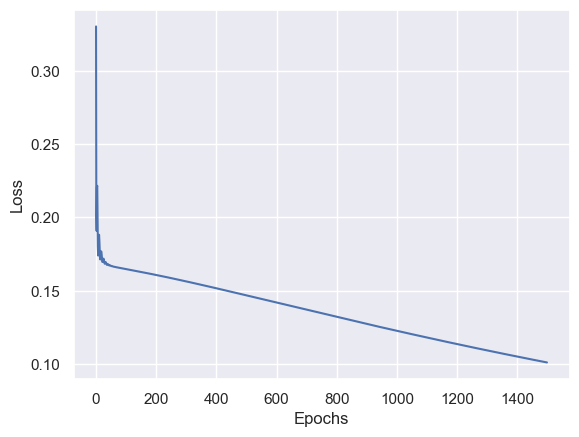

In [19]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

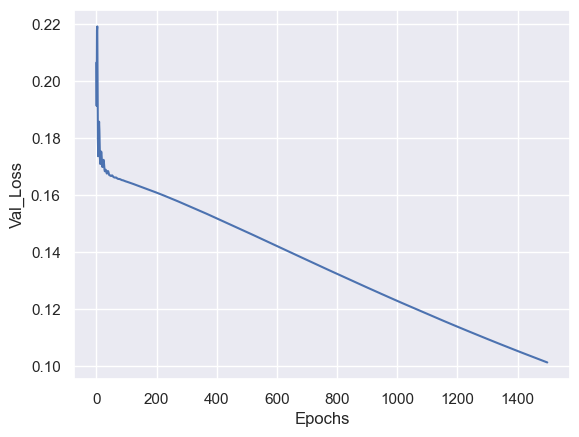

In [20]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [21]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\Alpha-Giants.h5


In [22]:
predalpha = modelAlpha.predict(X_test)

12/12 [==============================] - 0s 3ms/step


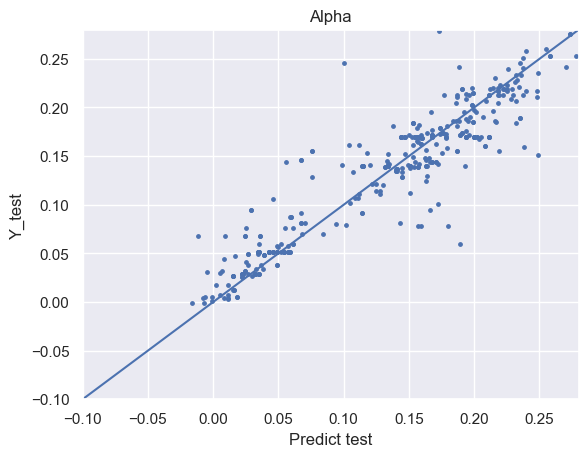

In [23]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [24]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 87.0%


In [25]:
Y_test['alpha_predict'] = predalpha

In [26]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659  
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818  
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151  
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193  
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028  
...                               ...            ...  
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945  
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683  
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683  
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984  
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778  

[377 rows x 11 columns]

In [27]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [28]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [29]:
modelCFE = training_model()
batchSize = 32
epochs = 200

In [30]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.8719 - val_loss: 0.4519 - 666ms/epoch - 666ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.4914 - val_loss: 0.2636 - 125ms/epoch - 125ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2817 - val_loss: 0.1988 - 65ms/epoch - 65ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2047 - val_loss: 0.2066 - 56ms/epoch - 56ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2065 - val_loss: 0.2351 - 55ms/epoch - 55ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2324 - val_loss: 0.2545 - 52ms/epoch - 52ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2505 - val_loss: 0.2564 - 46ms/epoch - 46ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.2518 - val_loss: 0.2449 - 48ms/epoch - 48ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.2400 - val_loss: 0.2270 - 50ms/epoch - 50ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2229 - val_loss: 0.2092 - 48ms/epoch - 48ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2062 - val_loss: 0.1954 - 52ms/epoch - 52ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1942 - val_loss: 0.1871 - 52ms/epoch - 52ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.1

Text(0, 0.5, 'Loss')

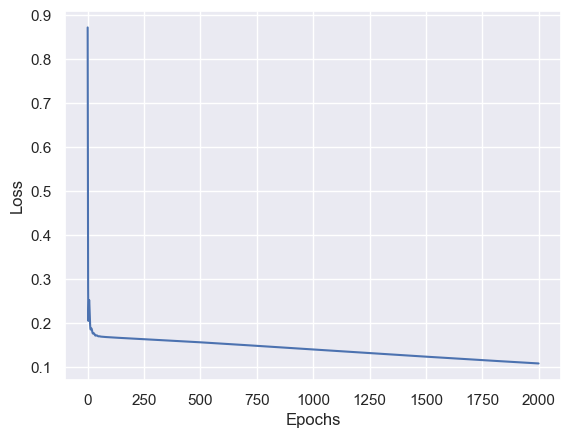

In [31]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

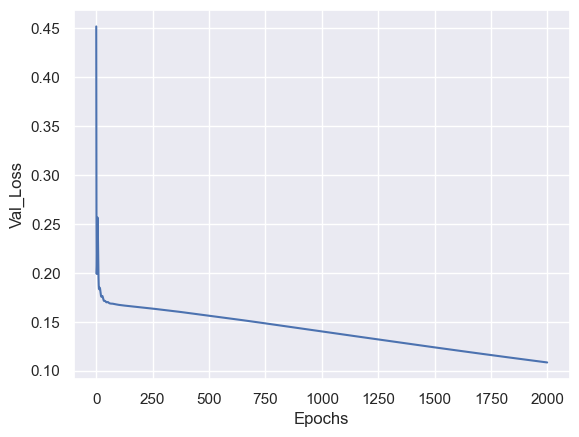

In [32]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [33]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CFE-Giants.h5


In [34]:
predCFE = modelCFE.predict(X_test)

 1/12 [=>............................] - ETA: 0s

12/12 [==============================] - 0s 3ms/step


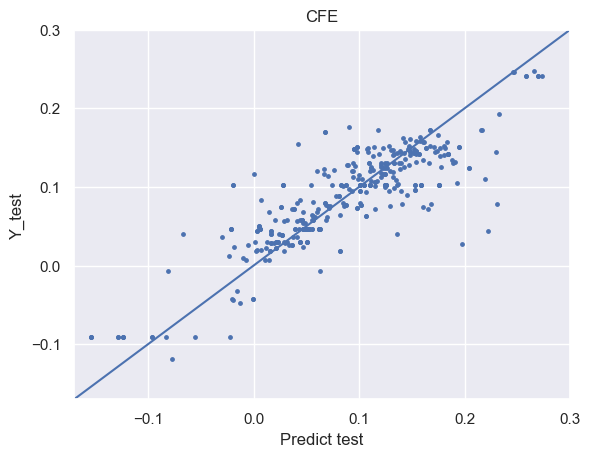

In [35]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [36]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 68.0%


In [37]:
Y_test['CFE_predict'] = predCFE

In [38]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  
ID                                                                 
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880  
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919  
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782  
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075  
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207  
...                               ...            ...          ...  
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148  
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074  
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074  
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964  
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970  

[377 rows x 12 columns]

In [39]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [40]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [42]:
modelCAFE = training_model()
batchSize = 32
epochs = 200

In [43]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1200


1/1 - 1s - loss: 0.2217 - val_loss: 0.1932 - 687ms/epoch - 687ms/step
Epoch 2/1200
1/1 - 0s - loss: 0.1919 - val_loss: 0.1855 - 49ms/epoch - 49ms/step
Epoch 3/1200
1/1 - 0s - loss: 0.1853 - val_loss: 0.1806 - 49ms/epoch - 49ms/step
Epoch 4/1200
1/1 - 0s - loss: 0.1814 - val_loss: 0.1798 - 48ms/epoch - 48ms/step
Epoch 5/1200
1/1 - 0s - loss: 0.1813 - val_loss: 0.1804 - 44ms/epoch - 44ms/step
Epoch 6/1200
1/1 - 0s - loss: 0.1816 - val_loss: 0.1778 - 45ms/epoch - 45ms/step
Epoch 7/1200
1/1 - 0s - loss: 0.1782 - val_loss: 0.1738 - 46ms/epoch - 46ms/step
Epoch 8/1200
1/1 - 0s - loss: 0.1736 - val_loss: 0.1710 - 43ms/epoch - 43ms/step
Epoch 9/1200
1/1 - 0s - loss: 0.1709 - val_loss: 0.1704 - 47ms/epoch - 47ms/step
Epoch 10/1200
1/1 - 0s - loss: 0.1707 - val_loss: 0.1710 - 45ms/epoch - 45ms/step
Epoch 11/1200
1/1 - 0s - loss: 0.1715 - val_loss: 0.1715 - 48ms/epoch - 48ms/step
Epoch 12/1200
1/1 - 0s - loss: 0.1721 - val_loss: 0.1716 - 44ms/epoch - 44ms/step
Epoch 13/1200
1/1 - 0s - loss: 0.172

Text(0, 0.5, 'Loss')

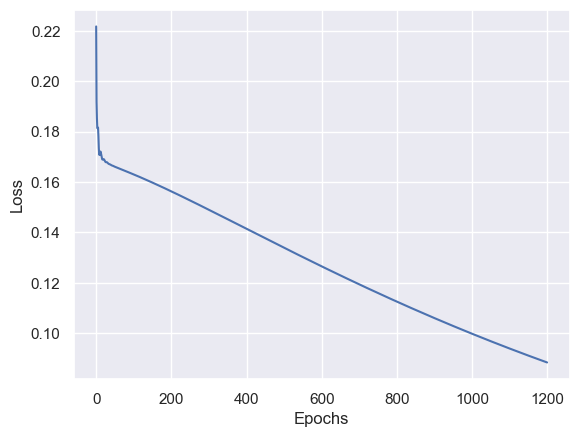

In [44]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

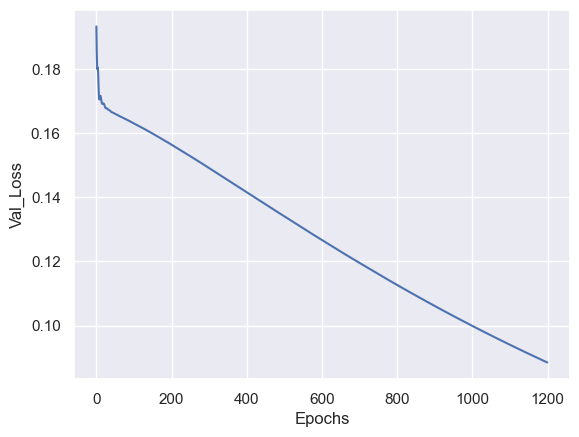

In [45]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [46]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\CAFE-Giants.h5


In [47]:
predCAFE = modelCAFE.predict(X_test)

 1/12 [=>............................] - ETA: 0s

12/12 [==============================] - 0s 3ms/step


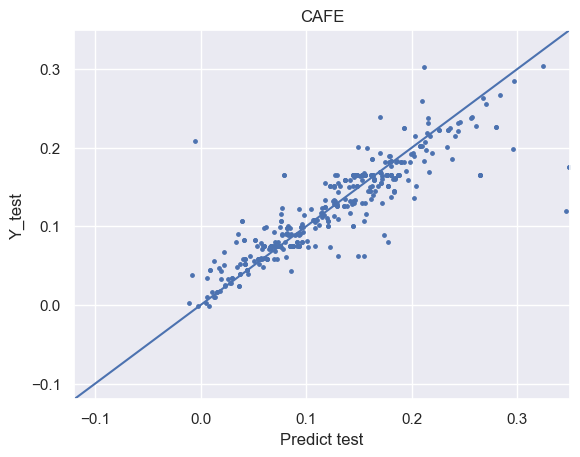

In [48]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [49]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 75.0%


In [50]:
Y_test['CAFE_predict'] = predCAFE

In [51]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  
ID                                          
iDR4_3_STRIPE82-0026_0054244      0.159296  
iDR4_3_SPLUS-n05s43_0016456       0.057780  
iDR4_3_SPLUS-s02s24_0028498       0.175843  
iDR4_3_SPLUS-n02n21_0026773       0.074252  
iDR4_3_STRIPE82-0028_0030694      0.058668  
...                                    ...  
iDR4_3_SPLUS-s02s25_0023200       0.231942  
iDR4_3_SPLUS-n06s42_0005104       0.202521  
iDR4_3_SPLUS-n06s42_0005104       0.202521  
iDR4_3_SPLUS-n05s44_0023213       0.052549  
iDR4_3_STRIPE82-0026_0045166      0.164952  

[377 rows x 13 columns]

In [52]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [53]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [55]:
modelNFE = training_model()
batchSize = 32
epochs = 200

In [56]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.3418 - val_loss: 0.2087 - 696ms/epoch - 696ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.2040 - val_loss: 0.1940 - 82ms/epoch - 82ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.1903 - val_loss: 0.2160 - 98ms/epoch - 98ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2164 - val_loss: 0.2231 - 42ms/epoch - 42ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2258 - val_loss: 0.2111 - 66ms/epoch - 66ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2136 - val_loss: 0.1923 - 96ms/epoch - 96ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1941 - val_loss: 0.1782 - 43ms/epoch - 43ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1795 - val_loss: 0.1732 - 43ms/epoch - 43ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1749 - val_loss: 0.1766 - 41ms/epoch - 41ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1793 - val_loss: 0.1829 - 42ms/epoch - 42ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1866 - val_loss: 0.1864 - 42ms/epoch - 42ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1909 - val_loss: 0.1850 - 41ms/epoch - 41ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.189

Text(0, 0.5, 'Loss')

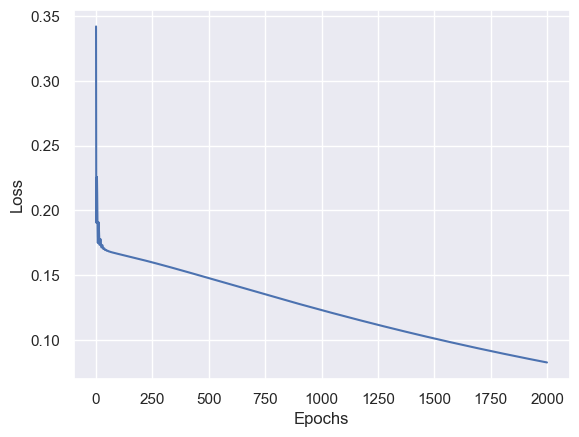

In [57]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

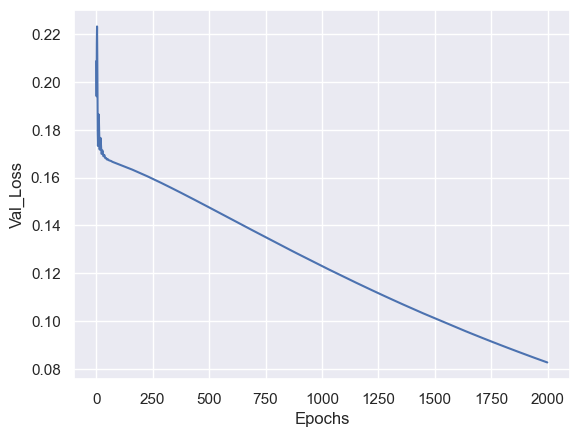

In [58]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [59]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NFE-Giants.h5


In [60]:
predNFE = modelNFE.predict(X_test)

 1/12 [=>............................] - ETA: 0s

12/12 [==============================] - 0s 2ms/step


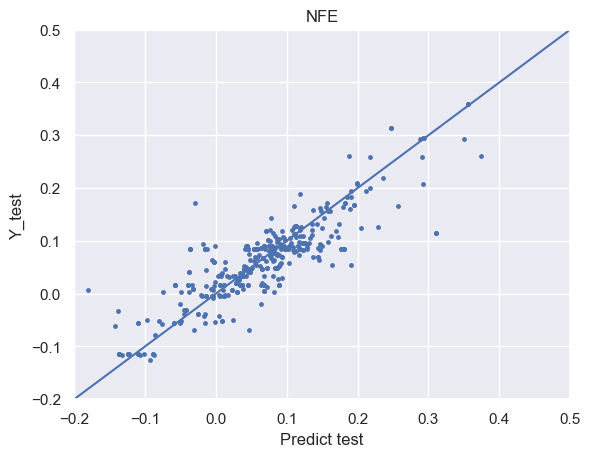

In [61]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [62]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%


In [63]:
Y_test['NFE_predict'] = predNFE

In [64]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_STRIPE82-0026_0054244      0.159296     0.090202  
iDR4_3_SPLUS-n05s43_0016456       0.057780     0.118391  
iDR4_3_SPLUS-s02s24_0028498       0.175843     0.313247  
iDR4_3_SPLUS-n02n21_0026773       0.074252     0.063277  
iDR4_3_STRIPE82-0028_0030694      0.058668    -0.003770  
...                                    ...          ...  
iDR4_3_SPLUS-s02s25_0023200       0.231942     0.294126  
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464  
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464  
iDR4_3_SPLUS-n05s44_0023213       0.052549     0.002697  
iDR4_3_STRIPE82-0026_0045166      0.164952     0.083755  

[377 rows x 14 columns]

In [65]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [66]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [68]:
modelMGFE = training_model()
batchSize = 32
epochs = 200

In [69]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.2737 - val_loss: 0.2040 - 609ms/epoch - 609ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.2015 - val_loss: 0.2146 - 92ms/epoch - 92ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2143 - val_loss: 0.2133 - 113ms/epoch - 113ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2141 - val_loss: 0.1966 - 61ms/epoch - 61ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.1971 - val_loss: 0.1823 - 69ms/epoch - 69ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1826 - val_loss: 0.1790 - 57ms/epoch - 57ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1796 - val_loss: 0.1833 - 55ms/epoch - 55ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1844 - val_loss: 0.1862 - 56ms/epoch - 56ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1877 - val_loss: 0.1839 - 58ms/epoch - 58ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1856 - val_loss: 0.1788 - 58ms/epoch - 58ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1802 - val_loss: 0.1750 - 58ms/epoch - 58ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1761 - val_loss: 0.1743 - 59ms/epoch - 59ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.1

Text(0, 0.5, 'Loss')

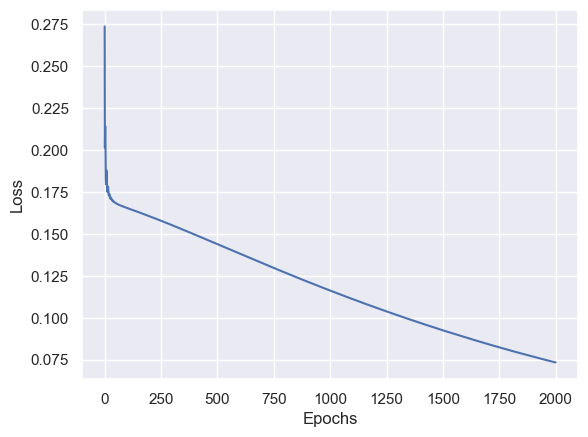

In [70]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

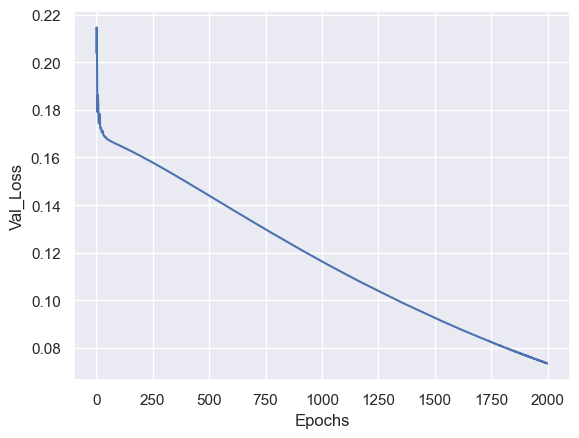

In [71]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [72]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\MGFE-Giants.h5


In [73]:
predMGFE = modelMGFE.predict(X_test)

12/12 [==============================] - 0s 2ms/step


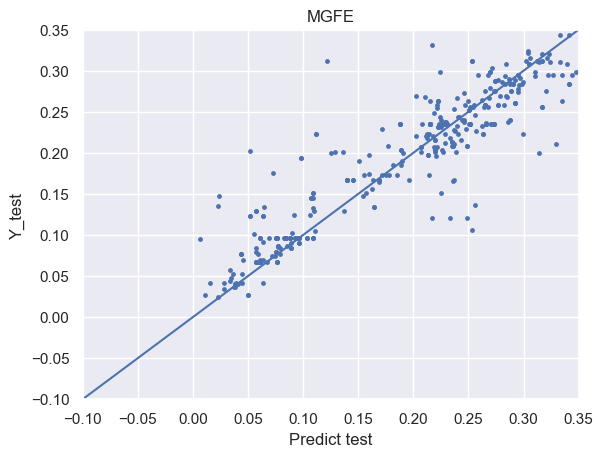

In [74]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.35)
plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [75]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 84.0%


In [76]:
Y_test['MGFE_predict'] = predMGFE

In [77]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_STRIPE82-0026_0054244      0.159296     0.090202      0.258778  
iDR4_3_SPLUS-n05s43_0016456       0.057780     0.118391      0.096574  
iDR4_3_SPLUS-s02s24_0028498       0.175843     0.313247      0.284271  
iDR4_3_SPLUS-n02n21_0026773       0.074252     0.063277      0.243749  
iDR4_3_STRIPE82-0028_0030694      0.058668    -0.003770      0.066562  
...                                    ...          ...           ...  
iDR4_3_SPLUS-s02s25_0023200       0.231942     0.294126      0.343403  
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115  
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115  
iDR4_3_SPLUS-n05s44_0023213       0.052549     0.002697      0.076868  
iDR4_3_STRIPE82-0026_0045166      0.164952     0.083755      0.234654  

[377 rows x 15 columns]

In [78]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [79]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [81]:
modelSIFE = training_model()
batchSize = 32
epochs = 200

In [82]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500


1/1 - 1s - loss: 0.2462 - val_loss: 0.1993 - 641ms/epoch - 641ms/step
Epoch 2/1500
1/1 - 0s - loss: 0.2010 - val_loss: 0.1858 - 72ms/epoch - 72ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.1851 - val_loss: 0.1826 - 67ms/epoch - 67ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.1815 - val_loss: 0.1825 - 68ms/epoch - 68ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.1825 - val_loss: 0.1820 - 58ms/epoch - 58ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.1825 - val_loss: 0.1796 - 57ms/epoch - 57ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.1799 - val_loss: 0.1765 - 46ms/epoch - 46ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.1761 - val_loss: 0.1738 - 50ms/epoch - 50ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.1731 - val_loss: 0.1721 - 50ms/epoch - 50ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.1715 - val_loss: 0.1712 - 52ms/epoch - 52ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.1711 - val_loss: 0.1710 - 49ms/epoch - 49ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.1713 - val_loss: 0.1711 - 52ms/epoch - 52ms/step
Epoch 13/1500
1/1 - 0s - loss: 0.171

Text(0, 0.5, 'Loss')

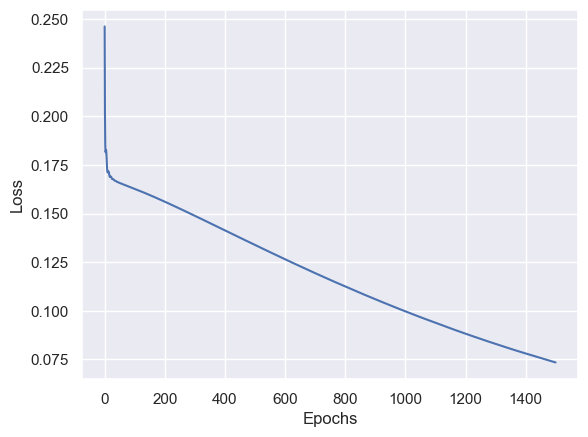

In [83]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

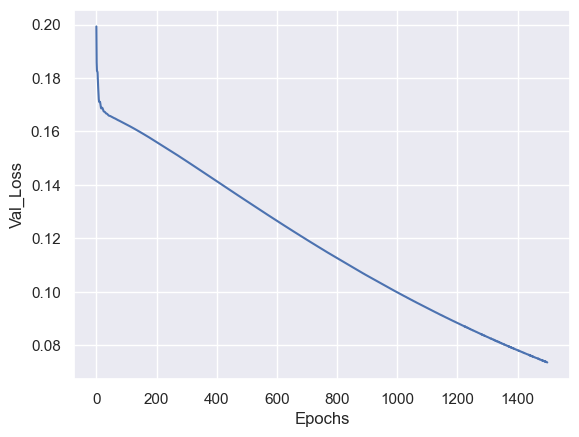

In [84]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [85]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\SIFE-Giants.h5


In [86]:
predSIFE = modelSIFE.predict(X_test)

12/12 [==============================] - 0s 3ms/step


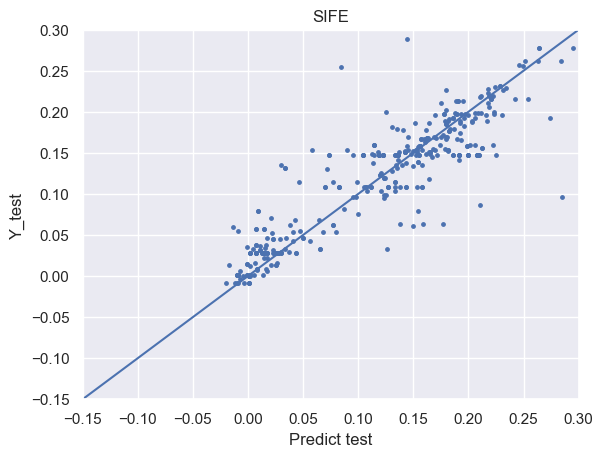

In [87]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [88]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 82.0%


In [89]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [90]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0026_0054244      0.159296     0.090202      0.258778   
iDR4_3_SPLUS-n05s43_0016456       0.057780     0.118391      0.096574   
iDR4_3_SPLUS-s02s24_0028498       0.175843     0.313247      0.284271   
iDR4_3_SPLUS-n02n21_0026773       0.074252     0.063277      0.243749   
iDR4_3_STRIPE82-0028_0030694      0.058668    -0.003770      0.066562   
...                                    ...          ...           ...   
iDR4_3_SPLUS-s02s25_0023200       0.231942     0.294126      0.343403   
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115   
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115   
iDR4_3_SPLUS-n05s44_0023213       0.052549     0.002697      0.076868   
iDR4_3_STRIPE82-0026_0045166      0.164952     0.083755      0.234654   

                              SIFE_predict  
ID                                          
iDR4_3_STRIPE82-0026_0054244      0.150565  
iDR4_3_SPLUS-n05s43_0016456       0.032213  
iDR4_3_SPLUS-s02s24_0028498       0.2

In [91]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [92]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Giants"
NomeBase = "LamostMedium"
BaseSaveModel = "Lamost-MR"

In [94]:
modelNIFE = training_model()
batchSize = 32
epochs = 200

In [95]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.1826 - val_loss: 0.1765 - 617ms/epoch - 617ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.1761 - val_loss: 0.1705 - 49ms/epoch - 49ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.1708 - val_loss: 0.1695 - 48ms/epoch - 48ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.1701 - val_loss: 0.1696 - 43ms/epoch - 43ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.1705 - val_loss: 0.1697 - 48ms/epoch - 48ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1704 - val_loss: 0.1685 - 48ms/epoch - 48ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1690 - val_loss: 0.1675 - 48ms/epoch - 48ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1679 - val_loss: 0.1676 - 47ms/epoch - 47ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1680 - val_loss: 0.1678 - 47ms/epoch - 47ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1681 - val_loss: 0.1676 - 49ms/epoch - 49ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1678 - val_loss: 0.1676 - 48ms/epoch - 48ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1675 - val_loss: 0.1677 - 46ms/epoch - 46ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.167

Text(0, 0.5, 'Loss')

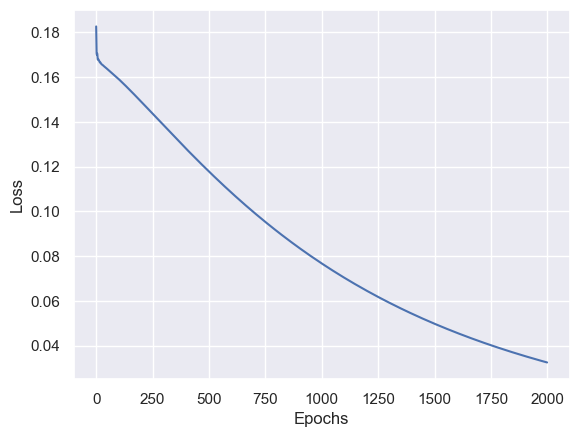

In [96]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

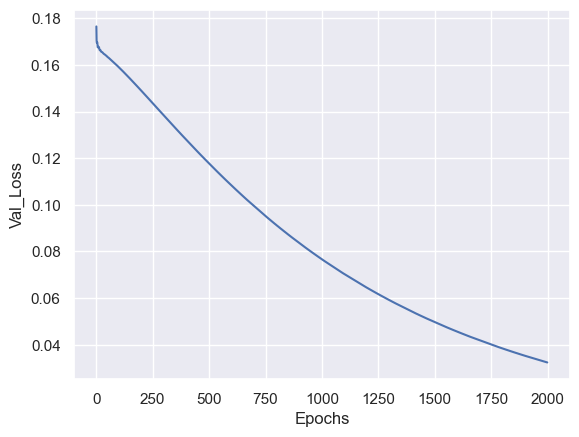

In [97]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [98]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Lamost-MR\NIFE-Giants.h5


In [99]:
predNIFE = modelNIFE.predict(X_test)

12/12 [==============================] - 0s 3ms/step


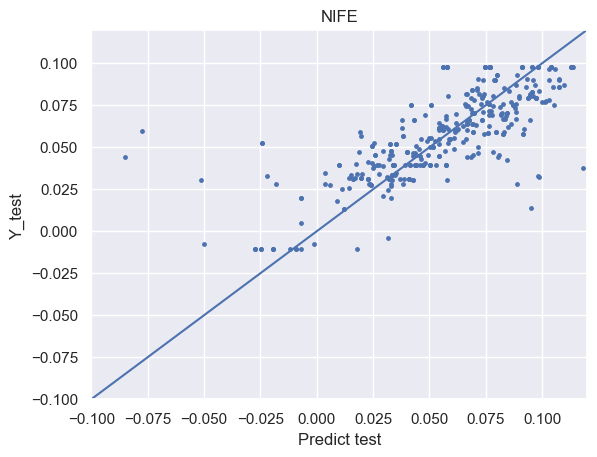

In [100]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [101]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 55.00000000000001%


In [102]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [103]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0026_0054244   4833.99     3.159   -0.254        0.168   
iDR4_3_SPLUS-n05s43_0016456    4882.97     3.050   -0.152        0.027   
iDR4_3_SPLUS-s02s24_0028498    5162.11     2.375   -1.700        0.286   
iDR4_3_SPLUS-n02n21_0026773    4452.11     2.263   -0.224        0.167   
iDR4_3_STRIPE82-0028_0030694   5024.55     3.483   -0.159        0.022   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-s02s25_0023200    5074.74     2.394   -1.103        0.273   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n06s42_0005104    5100.14     3.207   -0.787        0.235   
iDR4_3_SPLUS-n05s44_0023213    5010.97     3.556   -0.111        0.030   
iDR4_3_STRIPE82-0026_0045166   4962.91     2.767   -0.619        0.178   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0026_0054244  0.18458  0.13708  0.06772  0.26474  0.14233   
iDR4_3_SPLUS-n05s43_0016456   0.05619  0.04214  0.07139  0.06128  0.01109   
iDR4_3_SPLUS-s02s24_0028498   0.08181  0.34898  0.24760  0.34132  0.22846   
iDR4_3_SPLUS-n02n21_0026773   0.17408  0.10793  0.14561  0.24129  0.14992   
iDR4_3_STRIPE82-0028_0030694  0.04397  0.05588  0.01179  0.05723 -0.00865   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-s02s25_0023200   0.07282  0.24549  0.29250  0.33276  0.26306   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n06s42_0005104   0.20455  0.20757 -0.10937  0.31647  0.19904   
iDR4_3_SPLUS-n05s44_0023213   0.06830  0.05482 -0.03755  0.07949 -0.00497   
iDR4_3_STRIPE82-0026_0045166  0.08325  0.18772  0.11898  0.22692  0.15559   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0026_0054244  0.09743       0.171659     0.141880   
iDR4_3_SPLUS-n05s43_0016456   0.04282       0.049818     0.057919   
iDR4_3_SPLUS-s02s24_0028498  -0.13012       0.249151     0.018782   
iDR4_3_SPLUS-n02n21_0026773   0.08122       0.195193     0.145075   
iDR4_3_STRIPE82-0028_0030694  0.04108       0.029028     0.030207   
...                               ...            ...          ...   
iDR4_3_SPLUS-s02s25_0023200   0.08448       0.275945     0.075148   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n06s42_0005104   0.07320       0.188683     0.124074   
iDR4_3_SPLUS-n05s44_0023213   0.03461       0.026984     0.057964   
iDR4_3_STRIPE82-0026_0045166  0.09530       0.169778     0.102970   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0026_0054244      0.159296     0.090202      0.258778   
iDR4_3_SPLUS-n05s43_0016456       0.057780     0.118391      0.096574   
iDR4_3_SPLUS-s02s24_0028498       0.175843     0.313247      0.284271   
iDR4_3_SPLUS-n02n21_0026773       0.074252     0.063277      0.243749   
iDR4_3_STRIPE82-0028_0030694      0.058668    -0.003770      0.066562   
...                                    ...          ...           ...   
iDR4_3_SPLUS-s02s25_0023200       0.231942     0.294126      0.343403   
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115   
iDR4_3_SPLUS-n06s42_0005104       0.202521    -0.056464      0.256115   
iDR4_3_SPLUS-n05s44_0023213       0.052549     0.002697      0.076868   
iDR4_3_STRIPE82-0026_0045166      0.164952     0.083755      0.234654   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_STRIPE82-0026_0054244      0.150565      0.079104  
iDR4_3_SPLUS-n05s43_0016456       0.0322

In [104]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")